In [1]:
%load_ext memory_profiler
import numpy as np
import os
import matplotlib
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

import h5py
from scipy import integrate
import pandas as pd
import random
from scipy.signal import find_peaks
import qetpy as qp
# import sys
# sys.path.append("./")
from functions import *

In [2]:
matplotlib.rc('font', size=16)          # controls default text sizes
matplotlib.rc('axes', titlesize=16)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=16)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=14)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=14)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=16)    # legend fontsize
matplotlib.rc('figure', titlesize=16)  # fontsize of the figure title
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['figure.facecolor'] = 'w'
matplotlib.rc('figure.subplot', hspace=  0.4)
fs = 1/2e-9

templateEM_Tl,  TemplateEM_Tl = create_template(np.load(r'templates/Tl_template_pulses.npy'))
templateHAD_Tl,  TemplateHAD_Tl = create_template(np.load(r'templates/Tl_template_pulses_neutron.npy'))

templateEM_p,  TemplateEM_p = create_template(np.load(r'templates/pure_template_pulses.npy'))
templateHAD_p,  TemplateHAD_p = create_template(np.load(r'templates/pure_template_pulses_neutron.npy'))

fs =1/2e-9



# def OF_calct0(signal, template_norm, psd_noise, fs, recordlength):
#     amp, t0, chi2= [], [], []
#     for trace in np.arange(len(signal)):
#         OF = qp.OptimumFilter(signal[trace], template_norm, psd_noise, fs) # initialize the OptimumFilter class
#         amp_withdelay, t0_withdelay, chi2_withdelay= OF.ofamp_withdelay() # t0_withdelay : time shift calculated for the pulse (in s).
#         amp.append(amp_withdelay)
#         t0.append(t0_withdelay)
#         chi2.append(chi2_withdelay)
#     return amp, t0, chi2


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
# %%memit
# file = 'saved_outputs/pure_XFEL_beamON.hdf5'
# pure = sort()
# amp_EM_preselected = pure.func(File = file, key = 'amp_withdelay_EM', ctype = 'pure', level = 'preselected')
# deltachi2_preselected = pure.func(File = file, key = 'Delta_chi2', ctype = 'pure', level = 'preselected')


In [4]:
     
        
class variables():
    def var(self, File, ctype, examine):
        file = h5py.File(File)

        deltachi2 = file['Delta_chi2'][:]
        chi2_EM = file['chi2_withdelay_EM'][:]
        amppil_EM = file['amp_pileup_EM'][:]
        self.t0pil_EM = file['t0_pileup_EM'][:]
        chi2pil_EM = file['chi2_pileup_EM'][:]
        chi2_Had = file['chi2_withdelay_Had'][:]
        amppil_Had = file['amp_pileup_Had'][:]
        self.t0pil_Had = file['t0_pileup_Had'][:]
        chi2pil_Had = file['chi2_pileup_Had'][:]
        self.deltachi2 = file ['Delta_chi2'][:]

        gli= np.where(file['glitch'][:]==True)[0]
        clip= np.where(file['clipped'][:]==True)[0]
        pileup= np.where(file['pileup'][:]==True)[0]
        noisy= np.where(file['noisypulse'][:]==True)[0]
        self.select = np.unique(np.concatenate((gli,clip,pileup,noisy),0))
        if examine: 
            self.amp_EM_PS_removed = np.take(file ['amp_withdelay_EM'][:],self.select)
            self.t0_EM_PS_removed = np.take(file ['t0_withdelay_EM'][:],self.select)
        #     self.chi2_EM_PS_removed = np.take(file ['chi2_withdelay_EM'][:],self.select)
            self.amppil_EM_PS_removed = np.take(file['amp_pileup_EM'][:], self.select)
            self.t0pil_EM_PS_removed = np.take(file['t0_pileup_EM'][:], self.select)
        #     self.chi2pil_EM_PS_removed = np.take(file['chi2_pileup_EM'][:], self.select)    
            self.amp_Had_PS_removed = np.take(file ['amp_withdelay_Had'][:],self.select)
            self.t0_Had_PS_removed = np.take(file ['t0_withdelay_Had'][:],self.select)
            self.chi2_Had_PS_removed = np.take(file ['chi2_withdelay_Had'][:],self.select)
            self.amppil_Had_PS_removed = np.take(file['amp_pileup_Had'][:], self.select)
            self.t0pil_Had_PS_removed = np.take(file['t0_pileup_Had'][:], self.select)
            self.chi2pil_Had_PS_removed = np.take(file['chi2_pileup_Had'][:], self.select)
            self.integrated_raw_PS_removed = np.take(np.array(file ['integrated_raw_amp']), self.select)    
            self.deltachi2_PS_removed = np.take(np.array(file ['Delta_chi2']), self.select)
            self.CR_PS_removed = np.take(np.array(file ['charge_ratio']), self.select)
            self.rundata_PS_removed = np.take(file['rundata'][:],self.select)
            self.waveform_number_PS_removed = np.take(file['waveform_number'][:],self.select)
            self.data_min_PS_removed = np.take(file['data_amp_min'][:],self.select)

        self.amp_EM_PS = np.delete(file ['amp_withdelay_EM'][:],self.select)
        self.t0_EM_PS = np.delete(file ['t0_withdelay_EM'][:],self.select)
        self.chi2_EM_PS = np.delete(file ['chi2_withdelay_EM'][:],self.select)
        self.amppil_EM_PS = np.delete(file['amp_pileup_EM'][:], self.select)
        self.t0pil_EM_PS = np.delete(file['t0_pileup_EM'][:], self.select)
        self.chi2pil_EM_PS = np.delete(file['chi2_pileup_EM'][:], self.select)    
        self.amp_Had_PS = np.delete(file ['amp_withdelay_Had'][:],self.select)
        self.t0_Had_PS = np.delete(file ['t0_withdelay_Had'][:],self.select)
        self.chi2_Had_PS = np.delete(file ['chi2_withdelay_Had'][:],self.select)
        self.amppil_Had_PS = np.delete(file['amp_pileup_Had'][:], self.select)
        self.t0pil_Had_PS = np.delete(file['t0_pileup_Had'][:], self.select)
        self.chi2pil_Had_PS = np.delete(file['chi2_pileup_Had'][:], self.select)
        self.integrated_raw_PS = np.delete(np.array(file ['integrated_raw_amp']), self.select)    
        self.deltachi2_PS = np.delete(np.array(file ['Delta_chi2']), self.select)
        self.CR_PS = np.delete(np.array(file ['charge_ratio']), self.select)
        self.rundata_PS = np.delete(file['rundata'][:],self.select)
        self.waveform_number_PS = np.delete(file['waveform_number'][:],self.select)
        self.data_min_PS = np.delete(file['data_amp_min'][:],self.select)

        if ctype == 'Tl' :            
            select2 = [i for i in range (len(deltachi2)) if deltachi2[i]>0 and  (abs(amppil_EM[i] )>1000 and abs(self.t0pil_EM[i]*fs )>100 ) or (abs(amppil_EM[i] )>200 and abs(self.t0pil_EM[i]*fs )>1800 )]
            select3 = [i for i in range (len(deltachi2)) if deltachi2[i]<0 and (abs(amppil_Had[i] )>700 and abs(self.t0pil_Had[i]*fs )>700 ) or (abs(amppil_Had[i] )>200 and abs(self.t0pil_Had[i]*fs )>1800 )]
            select6 = [i for i in range (len(deltachi2)) if deltachi2[i]>0 and abs(amppil_EM[i] )>20 and self.t0pil_EM[i]*fs <0]
            select7 = [i for i in range (len(deltachi2)) if deltachi2[i]<0 and abs(amppil_Had[i] )>20 and self.t0pil_Had[i]*fs <0]
            select8 = [i for i in range (len(deltachi2)) if deltachi2[i]>0 and (chi2pil_EM[i] > 3.5e7 or chi2_EM[i]/15000>3000) ]
            select9 = [i for i in range (len(deltachi2)) if deltachi2[i]<0 and (chi2pil_Had[i] > 3.5e7 or chi2_Had[i]/15000>3000) ]
            self.select_FT = list(set(list(self.select)+ select2+select3+select8+select9+ select6+select7))
            self.select_FTonly = list(set( select2+select3+ select6+select7+select8+select9))

        if ctype == 'pure':
            select2 = [i for i in range (len(deltachi2)) if deltachi2[i]>0 and  (abs(amppil_EM[i]) > 150 and  abs(self.t0pil_EM[i]*fs) > 180)]
            select3 = [i for i in range (len(deltachi2)) if deltachi2[i]<0 and (abs(amppil_Had[i] ) > 150 and abs(self.t0pil_Had[i]*fs) > 180)]
            select6 = [i for i in range (len(deltachi2)) if deltachi2[i]>0 and (abs(amppil_EM[i] )>30 and self.t0pil_EM[i]*fs <-20) or (abs(amppil_EM[i] )>50 and self.t0pil_EM[i]*fs <-10)]
            select7 = [i for i in range (len(deltachi2)) if deltachi2[i]<0 and (abs(amppil_Had[i] )>30 and self.t0pil_Had[i]*fs <-20) or (abs(amppil_Had[i] )>50 and self.t0pil_Had[i]*fs <-10)]
            self.select_FT = list(set(list(self.select)+ select3+select2+ select6+select7))
            self.select_FTonly = list(set(select3+select2+ select6+select7))

        if examine: 
            self.amp_EM_PS_FT_removed = np.take(file ['amp_withdelay_EM'][:],self.select_FT)
            self.t0_EM_PS_FT_removed = np.take(file ['t0_withdelay_EM'][:],self.select_FT)
            self.chi2_EM_PS_FT_removed = np.take(file ['chi2_withdelay_EM'][:],self.select_FT)
            self.amppil_EM_PS_FT_removed = np.take(file['amp_pileup_EM'][:], self.select_FT)
            self.t0pil_EM_PS_FT_removed = np.take(file['t0_pileup_EM'][:], self.select_FT)
            self.chi2pil_EM_PS_FT_removed = np.take(file['chi2_pileup_EM'][:], self.select_FT)    
            self.amp_Had_PS_FT_removed = np.take(file ['amp_withdelay_Had'][:],self.select_FT)
            self.t0_Had_PS_FT_removed = np.take(file ['t0_withdelay_Had'][:],self.select_FT)
            self.chi2_Had_PS_FT_removed = np.take(file ['chi2_withdelay_Had'][:],self.select_FT)
            self.amppil_Had_PS_FT_removed = np.take(file['amp_pileup_Had'][:], self.select_FT)
            self.t0pil_Had_PS_FT_removed = np.take(file['t0_pileup_Had'][:], self.select_FT)
            self.chi2pil_Had_PS_FT_removed = np.take(file['chi2_pileup_Had'][:], self.select_FT)
            self.integrated_raw_PS_FT_removed = np.take(np.array(file ['integrated_raw_amp']), self.select_FT)    
            self.deltachi2_PS_FT_removed = np.take(np.array(file ['Delta_chi2']), self.select_FT)
            self.CR_PS_FT_removed = np.take(np.array(file ['charge_ratio']), self.select_FT)
            self.rundata_PS_FT_removed = np.take(file['rundata'][:],self.select_FT)
            self.waveform_number_PS_FT_removed = np.take(file['waveform_number'][:],self.select_FT)
            self.data_min_PS_FT_removed = np.take(file['data_amp_min'][:],self.select_FT)

        self.amp_EM_PS_FT = np.delete(file ['amp_withdelay_EM'][:],self.select_FT)
        self.t0_EM_PS_FT = np.delete(file ['t0_withdelay_EM'][:],self.select_FT)
        self.chi2_EM_PS_FT = np.delete(file ['chi2_withdelay_EM'][:],self.select_FT)
        self.amppil_EM_PS_FT = np.delete(file['amp_pileup_EM'][:], self.select_FT)
        self.t0pil_EM_PS_FT = np.delete(file['t0_pileup_EM'][:], self.select_FT)
        self.chi2pil_EM_PS_FT = np.delete(file['chi2_pileup_EM'][:], self.select_FT)    
        self.amp_Had_PS_FT = np.delete(file ['amp_withdelay_Had'][:],self.select_FT)
        self.t0_Had_PS_FT = np.delete(file ['t0_withdelay_Had'][:],self.select_FT)
        self.chi2_Had_PS_FT = np.delete(file ['chi2_withdelay_Had'][:],self.select_FT)
        self.amppil_Had_PS_FT = np.delete(file['amp_pileup_Had'][:], self.select_FT)
        self.t0pil_Had_PS_FT = np.delete(file['t0_pileup_Had'][:], self.select_FT)
        self.chi2pil_Had_PS_FT = np.delete(file['chi2_pileup_Had'][:], self.select_FT)
        self.integrated_raw_PS_FT = np.delete(np.array(file ['integrated_raw_amp']), self.select_FT)    
        self.deltachi2_PS_FT = np.delete(np.array(file ['Delta_chi2']), self.select_FT)
        self.CR_PS_FT = np.delete(np.array(file ['charge_ratio']), self.select_FT)
        self.rundata_PS_FT = np.delete(file['rundata'][:],self.select_FT)
        self.waveform_number_PS_FT = np.delete(file['waveform_number'][:],self.select_FT)
        self.data_min_PS_FT = np.delete(file['data_amp_min'][:],self.select_FT)

        select2 = [i for i in range (len(self.deltachi2_PS)) if self.deltachi2_PS[i]>0 and  (abs(self.amppil_EM_PS[i] )>1000 and abs(self.t0pil_EM_PS[i]*fs )>100 ) or (abs(self.amppil_EM_PS[i] )>200 and abs(self.t0pil_EM_PS[i]*fs )>1800 )]
        select3 = [i for i in range (len(self.deltachi2_PS)) if self.deltachi2_PS[i]<0 and (abs(self.amppil_Had_PS[i] )>700 and abs(self.t0pil_Had_PS[i]*fs )>700 ) or (abs(self.amppil_Had_PS[i] )>200 and abs(self.t0pil_Had_PS[i]*fs )>1800 )]
        select6 = [i for i in range (len(self.deltachi2_PS)) if self.deltachi2_PS[i]>0 and abs(self.amppil_EM_PS[i] )>20 and self.t0pil_EM_PS[i]*fs <0]
        select7 = [i for i in range (len(self.deltachi2_PS)) if self.deltachi2_PS[i]<0 and abs(self.amppil_Had_PS[i] )>20 and self.t0pil_Had_PS[i]*fs <0]
        select8 = [i for i in range (len(self.deltachi2_PS)) if self.deltachi2_PS[i]>0 and (self.chi2pil_EM_PS[i] > 3.5e7 or self.chi2_EM_PS[i]/15000>3000) ]
        select9 = [i for i in range (len(self.deltachi2_PS)) if self.deltachi2_PS[i]<0 and (self.chi2pil_Had_PS[i] > 3.5e7 or self.chi2_Had_PS[i]/15000>3000) ]
        self.select_FTonly = list(set( select2+select3+ select6+select7+select8+select9))
      
        self.deltachi2_FT_removed = np.take(self.deltachi2_PS, self.select_FTonly)
        self.t0pil_Had_FT_removed = np.take(self.t0pil_Had_PS, self.select_FTonly)
        self.t0pil_EM_FT_removed = np.take(self.t0pil_EM_PS, self.select_FTonly)
        self.amppil_Had_FT_removed = np.take(self.amppil_Had_PS, self.select_FTonly)
        self.amppil_EM_FT_removed = np.take(self.amppil_EM_PS, self.select_FTonly)
        self.waveform_number_FT_removed = np.take(self.waveform_number_PS, self.select_FTonly)
        self.rundata_FT_removed = np.take(self.rundata_PS, self.select_FTonly)
        self.amp_Had_FT_removed = np.take(self.amp_Had_PS, self.select_FTonly)
        self.amp_EM_FT_removed = np.take(self.amp_EM_PS, self.select_FTonly)
        self.t0_Had_FT_removed = np.take(self.t0_Had_PS, self.select_FTonly)
        self.t0_EM_FT_removed = np.take(self.t0_EM_PS, self.select_FTonly)

In [5]:
%%time
file = 'saved_outputs/Tl_XFEL_beamON.hdf5'
Tl =variables()
Tl.var(File = file, ctype = 'Tl', examine = True)

CPU times: user 46.9 s, sys: 14.6 s, total: 1min 1s
Wall time: 1min 11s


In [11]:
print('all', 6522407)
print(len(Tl.select) )
print(len(Tl.select_FT) )
print(len(Tl.amp_EM_PS_FT) )

all 6522407
910868
1661914
4860493


In [19]:
print('all', 6522407)
print(len(Tl.select) )
print(len(Tl.select_FT) )
print(len(Tl.amp_EM_PS_FT) )

all 6522407
910868
1661914
4860493


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


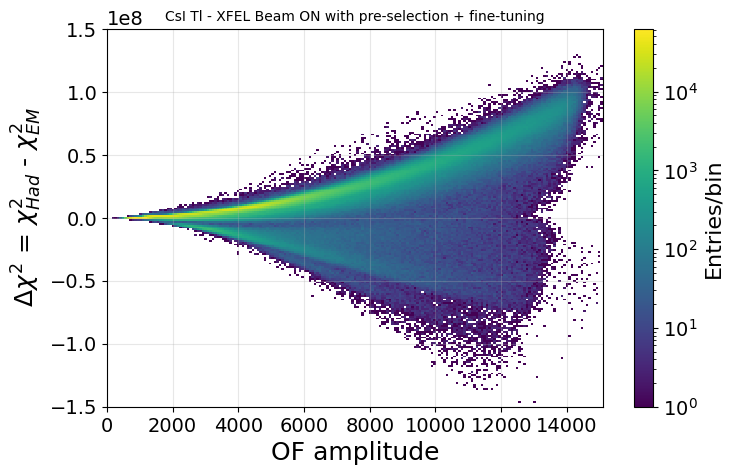

peak memory: 3858.64 MiB, increment: 153.56 MiB


In [12]:
%%memit

plt.figure(figsize=(8, 5))
plt.hist2d(Tl.amp_EM_PS_FT , Tl.deltachi2_PS_FT ,bins=(np.linspace(0,15100,200),np.linspace(-0.15e9, 0.15e9, 200)), cmin=1, norm=LogNorm())
plt.xlabel(r'OF amplitude',fontsize=18)
plt.ylabel(r'   $\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$ ',fontsize=18)
plt.grid(alpha=0.3)
plt.title('CsI Tl - XFEL Beam ON with pre-selection + fine-tuning',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries/bin')
plt.show()
# plt.figure(figsize=(8, 5))
# plt.hist2d(Tl.amp_EM_PS , Tl.deltachi2_PS ,bins=(np.linspace(0,15100,200),np.linspace(-0.15e9, 0.15e9, 200)), cmin=1, norm=LogNorm())
# plt.xlabel(r'OF amplitude',fontsize=18)
# plt.ylabel(r'   $\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$ ',fontsize=18)
# plt.grid(alpha=0.3)
# plt.title('CsI Tl - XFEL Beam ON with pre-selection ',fontsize=10)
# cbar = plt.colorbar()
# cbar.set_label('Entries/bin')
# plt.show()

# plt.figure(figsize=(8, 5))
# plt.hist2d(Tl.amp_EM_PS_FT_removed , Tl.deltachi2_PS_FT_removed ,bins=(np.linspace(0,15100,200),np.linspace(-0.15e9, 0.15e9, 200)), cmin=1, norm=LogNorm())
# plt.xlabel(r'OF amplitude',fontsize=18)
# plt.ylabel(r'   $\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$',fontsize=18)
# # plt.grid(alpha=0.3)
# plt.title('CsI Tl - XFEL Beam ON - removed events by pre-selection +  fine-tuning',fontsize=8)
# cbar = plt.colorbar()
# cbar.set_label('Entries/bin')
# plt.show()
# plt.figure(figsize=(8, 5))
# plt.hist2d(Tl.amp_EM_FT_removed , Tl.deltachi2_FT_removed ,bins=(np.linspace(0,15100,200),np.linspace(-0.15e9, 0.15e9, 200)), cmin=1, norm=LogNorm())
# plt.xlabel(r'OF amplitude',fontsize=18)
# plt.ylabel(r'   $\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$',fontsize=18)
# # plt.grid(alpha=0.3)
# plt.title('CsI Tl - XFEL Beam ON - removed events by fine-tuning',fontsize=10)
# cbar = plt.colorbar()
# cbar.set_label('Entries/bin')
# plt.show()

# plt.figure(figsize=(8, 5))
# plt.hist2d(Tl.amp_EM_PS_removed , Tl.deltachi2_PS_removed ,bins=(np.linspace(0,15100,200),np.linspace(-0.15e9, 0.15e9, 200)), cmin=1, norm=LogNorm())
# plt.xlabel(r'OF amplitude',fontsize=18)
# plt.ylabel(r'   $\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$',fontsize=18)
# # plt.grid(alpha=0.3)
# plt.title('CsI Tl - XFEL Beam ON - removed events by pre-selection',fontsize=10)
# cbar = plt.colorbar()
# cbar.set_label('Entries/bin')
# plt.show()

peak memory: 3900.08 MiB, increment: 169.74 MiB


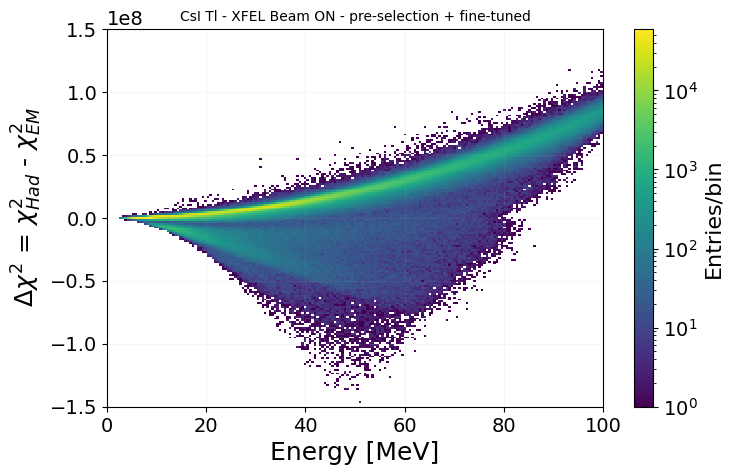

In [8]:
%%memit
E = Ecalibration(Tl.integrated_raw_PS_FT, 'Tl')
plt.figure(figsize=(8, 5))
plt.hist2d(E , Tl.deltachi2_PS_FT ,bins=(np.linspace(0,100,200),np.linspace(-0.15e9, 0.15e9, 200)), cmin=1, norm=LogNorm())
plt.xlabel(r'Energy [MeV]',fontsize=18)
plt.ylabel(r'   $\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$',fontsize=18)
plt.grid(alpha=0.1)
plt.title('CsI Tl - XFEL Beam ON - pre-selection + fine-tuned',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries/bin')


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:20: DeprecationWarning: invalid escape sequence \,
<>:20: DeprecationWarning: invalid escape sequence \,
<ipython-input-15-dfff078bd1d4>:20: DeprecationWarning: invalid escape sequence \,
  ax[i].set_title(r'CsI Tl - beam ON - Energy: '+str(s)+'-'+str(s+5)+'$\,$MeV',fontsize =18)


IndexError: index 6 is out of bounds for axis 0 with size 6

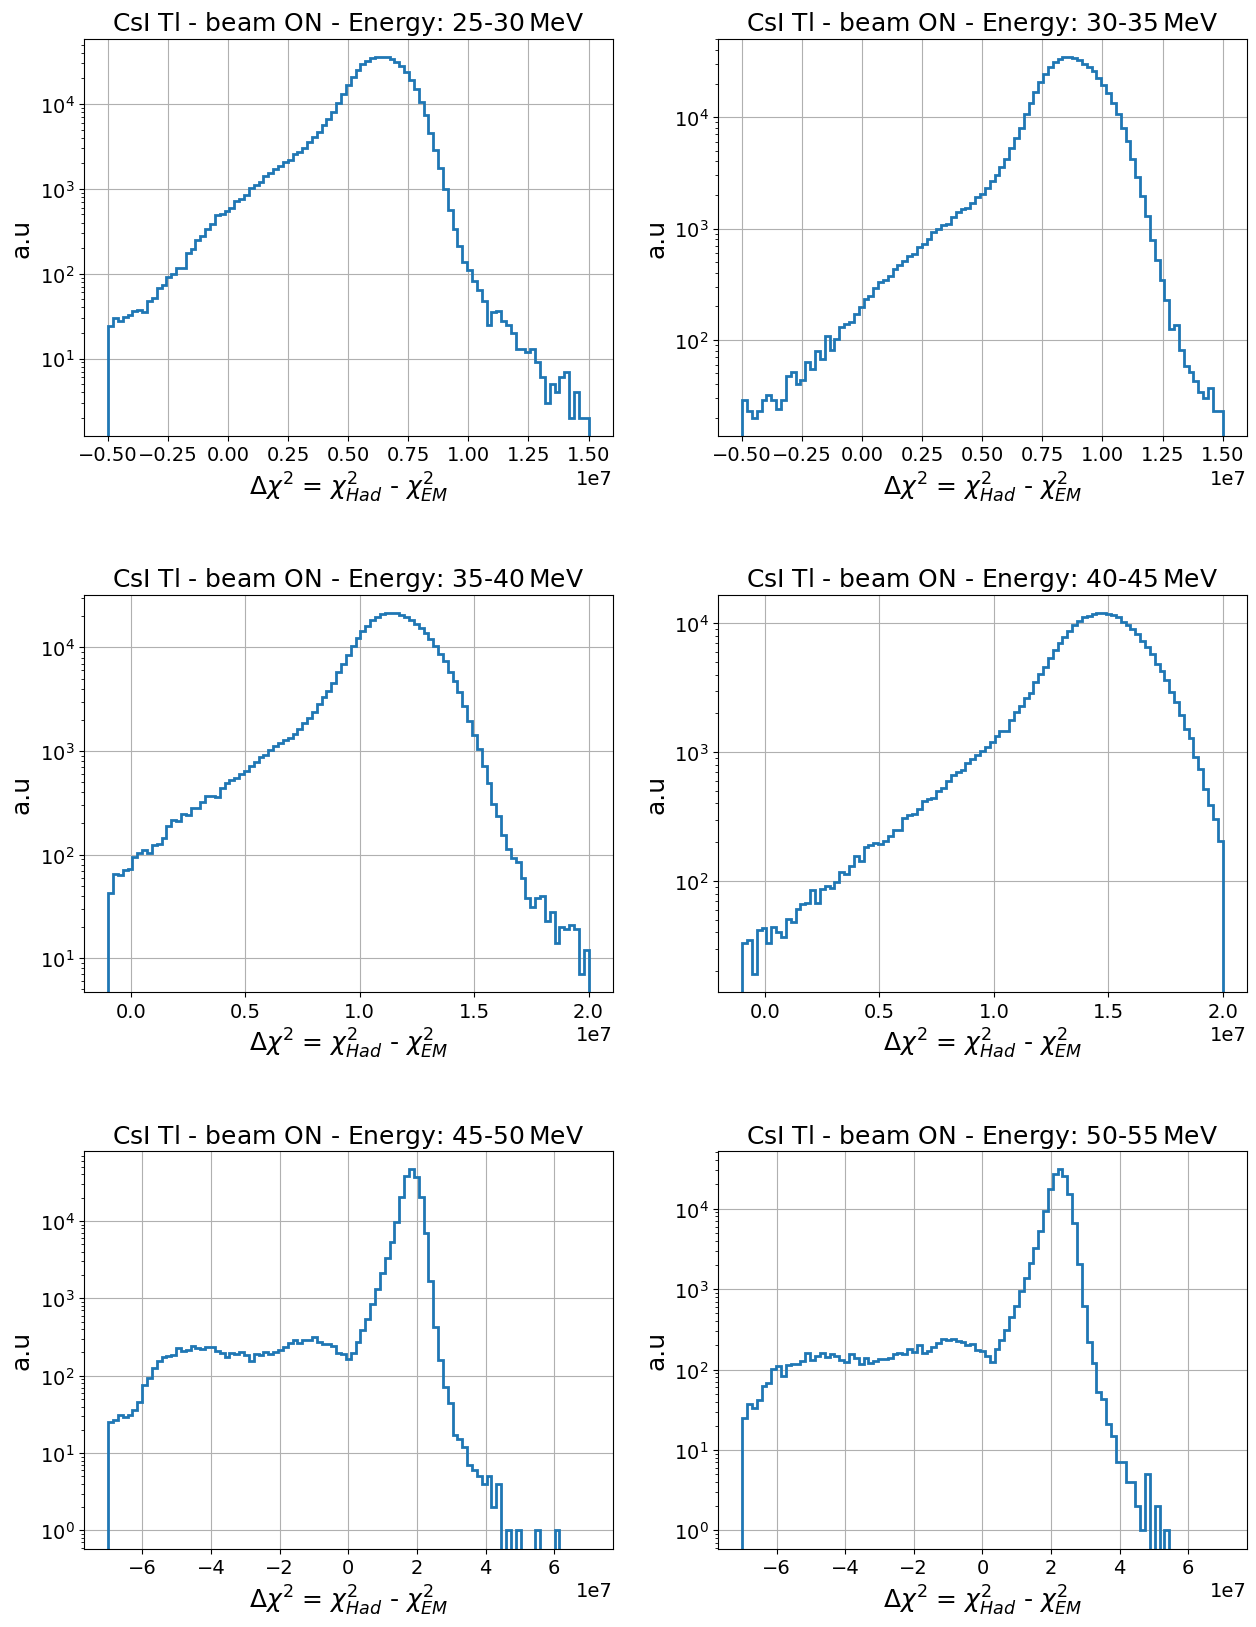

In [15]:



slices=np.arange(25,60,5)
fig, ax = plt.subplots(3, 2, figsize=(15,20))
ax = ax.flatten()
# ax[-1].axis('off'); ax[-2].axis('off')
for i, s in enumerate(slices):
#     sl = [i for i, x in enumerate(E) if x>s and x<s+5]
#     if s  < 20: bins = np.linspace(-0.5e6,0.5e6,100)
#     elif s  < 40: bins = np.linspace(-1e6,1e6,100)
#     elif s  < 60: bins = np.linspace(-2e6,2e6,100)
#     else: bins = np.linspace(-3e6,3e6,100)
#     weights = np.ones_like(np.take(pure.deltachi2_PS,sl))/len(np.take(pure.deltachi2_PS,sl))
#     ax[i].hist(np.take(pure.deltachi2_PS,sl), bins =bins, histtype = 'step', linewidth =2, label = 'pre-selection')
    sl = [i for i, x in enumerate(E) if x>s and x<s+5]
    if s  < 35: bins = np.linspace(-0.5e7,1.5e7,100)
    elif s  < 45: bins = np.linspace(-0.1e7,0.2e8,100)
    elif s  < 60: bins = np.linspace(-0.7e8,0.7e8,100)
    else: bins = np.linspace(-1.3e8,1.3e8,100)
    weights = np.ones_like(np.take(Tl.deltachi2_PS_FT,sl))/len(np.take(Tl.deltachi2_PS_FT,sl))
    ax[i].hist(np.take(Tl.deltachi2_PS_FT,sl), bins =bins, histtype = 'step' , linewidth =2, label = 'pre-selection + fine-tuned')
    ax[i].set_title(r'CsI Tl - beam ON - Energy: '+str(s)+'-'+str(s+5)+' MeV',fontsize =18)
    ax[i].set_xlabel(r'$\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$',fontsize =18)
    ax[i].set_ylabel(r'a.u',fontsize =18)
    ax[i].grid()
    ax[i].set_yscale('log')
    ax[i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#     ax[i].legend()
plt.show()

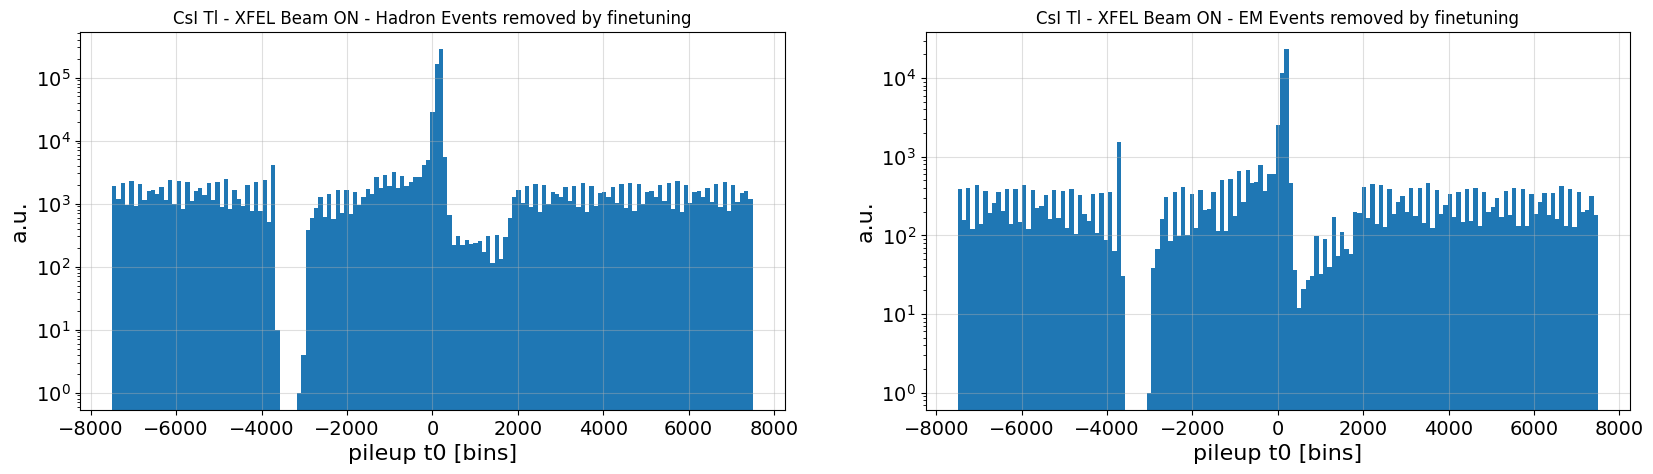

In [26]:
# ln = [i for i, x in enumerate(Tl.deltachi2) if x>0]
# lp = [i for i, x in enumerate(Tl.deltachi2) if x<0]
# plt.figure(figsize=(20, 12))
# plt.subplot(2,2,1)
# plt.hist(np.take(Tl.t0pil_Had*fs, ln), bins =np.linspace(-100,500,60))
# plt.xlabel('pileup t0 [bins]')
# plt.ylabel('a.u.')
# plt.grid(alpha = 0.4)
# plt.title('CsI Tl - XFEL Beam ON - all events, Hadron Events', fontsize = 12)
# plt.subplot(2,2,2)
# plt.hist(np.take(Tl.t0pil_EM*fs,lp), bins =np.linspace(-100,500,60))
# # plt.yscale('log')
# plt.xlabel('pileup t0 [bins]')
# plt.ylabel('a.u.')
# plt.grid(alpha = 0.4)
# plt.title('CsI Tl - XFEL Beam ON - all events, EM Events', fontsize = 12)
# plt.savefig('../../../plots/beamON/t0pileup_Tl_XFEL_BeamON_all.png',bbox_inches = 'tight')
# plt.show()
# ln = [i for i, x in enumerate(Tl.deltachi2_PS_removed) if x>0]
# lp = [i for i, x in enumerate(Tl.deltachi2_PS_removed) if x<0]
# plt.figure(figsize=(20, 12))
# plt.subplot(2,2,1)
# plt.hist(np.take(Tl.t0pil_Had_PS_removed*fs, ln), bins =np.linspace(-100,500,60))
# plt.xlabel('pileup t0 [bins]')
# plt.ylabel('a.u.')
# plt.grid(alpha = 0.4)
# plt.title('CsI Tl - XFEL Beam ON - Hadron Events removed by pre-selection', fontsize = 12)
# plt.subplot(2,2,2)
# plt.hist(np.take(Tl.t0pil_EM_PS_removed*fs,lp), bins =np.linspace(-100,500,60))
# # plt.yscale('log')
# plt.xlabel('pileup t0 [bins]')
# plt.ylabel('a.u.')
# plt.grid(alpha = 0.4)
# plt.title('CsI Tl - XFEL Beam ON - EM Events removed by pre-selection', fontsize = 12)
# plt.savefig('../../../plots/beamON/t0pileup_Tl_XFEL_BeamON_PS_removed.png',bbox_inches = 'tight')
# plt.show()


# ln = [i for i, x in enumerate(Tl.deltachi2_PS_FT_removed) if x>0]
# lp = [i for i, x in enumerate(Tl.deltachi2_PS_FT_removed) if x<0]
# plt.figure(figsize=(20, 12))
# plt.subplot(2,2,1)
# plt.hist(np.take(Tl.t0pil_Had_PS_FT_removed*fs, ln), bins =np.linspace(-100,500,60))
# plt.xlabel('pileup t0 [bins]')
# plt.ylabel('a.u.')
# plt.grid(alpha = 0.4)
# plt.title('CsI Tl - XFEL Beam ON - Hadron Events removed by preselection + finetuning ', fontsize = 12)
# plt.subplot(2,2,2)
# plt.hist(np.take(Tl.t0pil_EM_PS_FT_removed*fs,lp), bins =np.linspace(-100,500,60))
# # plt.yscale('log')
# plt.xlabel('pileup t0 [bins]')
# plt.ylabel('a.u.')
# plt.grid(alpha = 0.4)
# plt.title('CsI Tl - XFEL Beam ON - EM Events removed by preselection + finetuning ', fontsize = 12)
# plt.savefig('../../../plots/beamON/t0pileup_Tl_XFEL_BeamON_PS_FT_removed.png',bbox_inches = 'tight')
# plt.show()
ln = [i for i, x in enumerate(Tl.deltachi2_FT_removed) if x>0]
lp = [i for i, x in enumerate(Tl.deltachi2_FT_removed) if x<0]
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
plt.hist(np.take(Tl.t0pil_Had_FT_removed*fs, ln), bins =np.linspace(-7500,7500,150))
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
plt.yscale('log')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON - Hadron Events removed by finetuning', fontsize = 12)
plt.subplot(2,2,2)
plt.hist(np.take(Tl.t0pil_EM_FT_removed*fs,lp), bins =np.linspace(-7500,7500,150))
# plt.yscale('log')
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
plt.yscale('log')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON - EM Events removed by finetuning', fontsize = 12)
# plt.savefig('../../../plots/beamON/t0pileup_Tl_XFEL_BeamON_FT_removed_log.png',bbox_inches = 'tight')
plt.show()

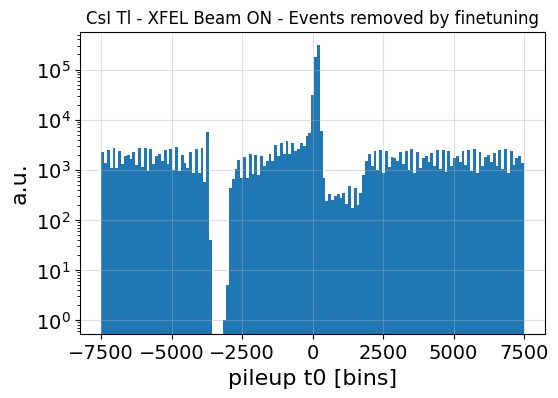

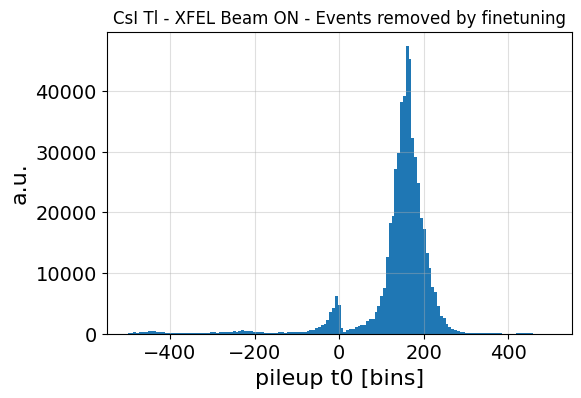

In [10]:
ln = [i for i, x in enumerate(Tl.deltachi2_FT_removed) if x>0]
lp = [i for i, x in enumerate(Tl.deltachi2_FT_removed) if x<0]
t0pil_FT_removed = np.concatenate((np.take(Tl.t0pil_Had_FT_removed*fs, ln),np.take(Tl.t0pil_EM_FT_removed*fs,lp)),0)
plt.hist(t0pil_FT_removed, bins =np.linspace(-7500,7500,150))
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
plt.yscale('log')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON - Events removed by finetuning', fontsize = 12)
plt.savefig('../../../plots/beamON/t0pileup_Tl_XFEL_BeamON_FT_removed_log.png',bbox_inches = 'tight')
plt.show()
ln = [i for i, x in enumerate(Tl.deltachi2_FT_removed) if x>0]
lp = [i for i, x in enumerate(Tl.deltachi2_FT_removed) if x<0]
t0pil_FT_removed = np.concatenate((np.take(Tl.t0pil_Had_FT_removed*fs, ln),np.take(Tl.t0pil_EM_FT_removed*fs,lp)),0)
plt.hist(t0pil_FT_removed, bins =np.linspace(-500,500,150))
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
# plt.yscale('log')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON - Events removed by finetuning', fontsize = 12)
plt.savefig('../../../plots/beamON/t0pileup_Tl_XFEL_BeamON_FT_removed.png',bbox_inches = 'tight')
plt.show()

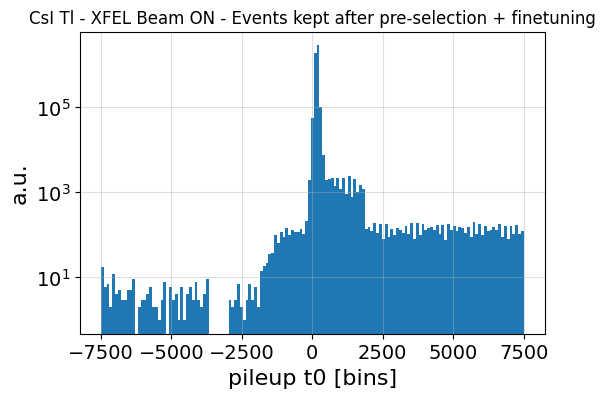

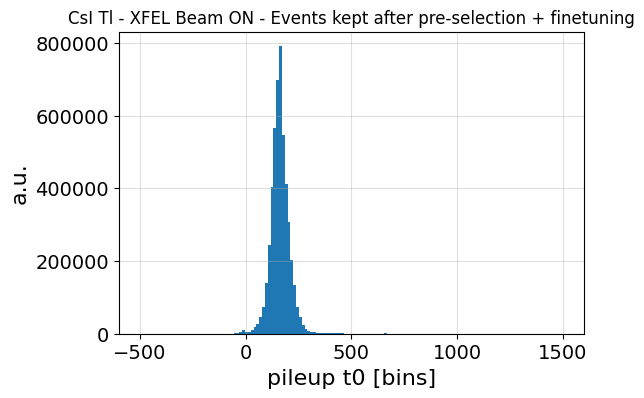

In [5]:
ln = [i for i, x in enumerate(Tl.deltachi2_PS_FT) if x>0]
lp = [i for i, x in enumerate(Tl.deltachi2_PS_FT) if x<0]
t0pil_PS_FT = np.concatenate((np.take(Tl.t0pil_Had_PS_FT*fs, ln),np.take(Tl.t0pil_EM_PS_FT*fs,lp)),0)
plt.hist(t0pil_PS_FT, bins =np.linspace(-7500,7500,150))
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
plt.yscale('log')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON - Events kept after pre-selection + finetuning', fontsize = 12)
plt.savefig('../../../plots/beamON/t0pileup_Tl_XFEL_BeamON_kept_log.png',bbox_inches = 'tight')
plt.show()
ln = [i for i, x in enumerate(Tl.deltachi2_PS_FT) if x>0]
lp = [i for i, x in enumerate(Tl.deltachi2_PS_FT) if x<0]
t0pil_PS_FT = np.concatenate((np.take(Tl.t0pil_Had_PS_FT*fs, ln),np.take(Tl.t0pil_EM_PS_FT*fs,lp)),0)
plt.hist(t0pil_PS_FT, bins =np.linspace(-500,1500,150))
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
# plt.yscale('log')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON - Events kept after pre-selection + finetuning', fontsize = 12)
plt.savefig('../../../plots/beamON/t0pileup_Tl_XFEL_BeamON_kept.png',bbox_inches = 'tight')
plt.show()

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


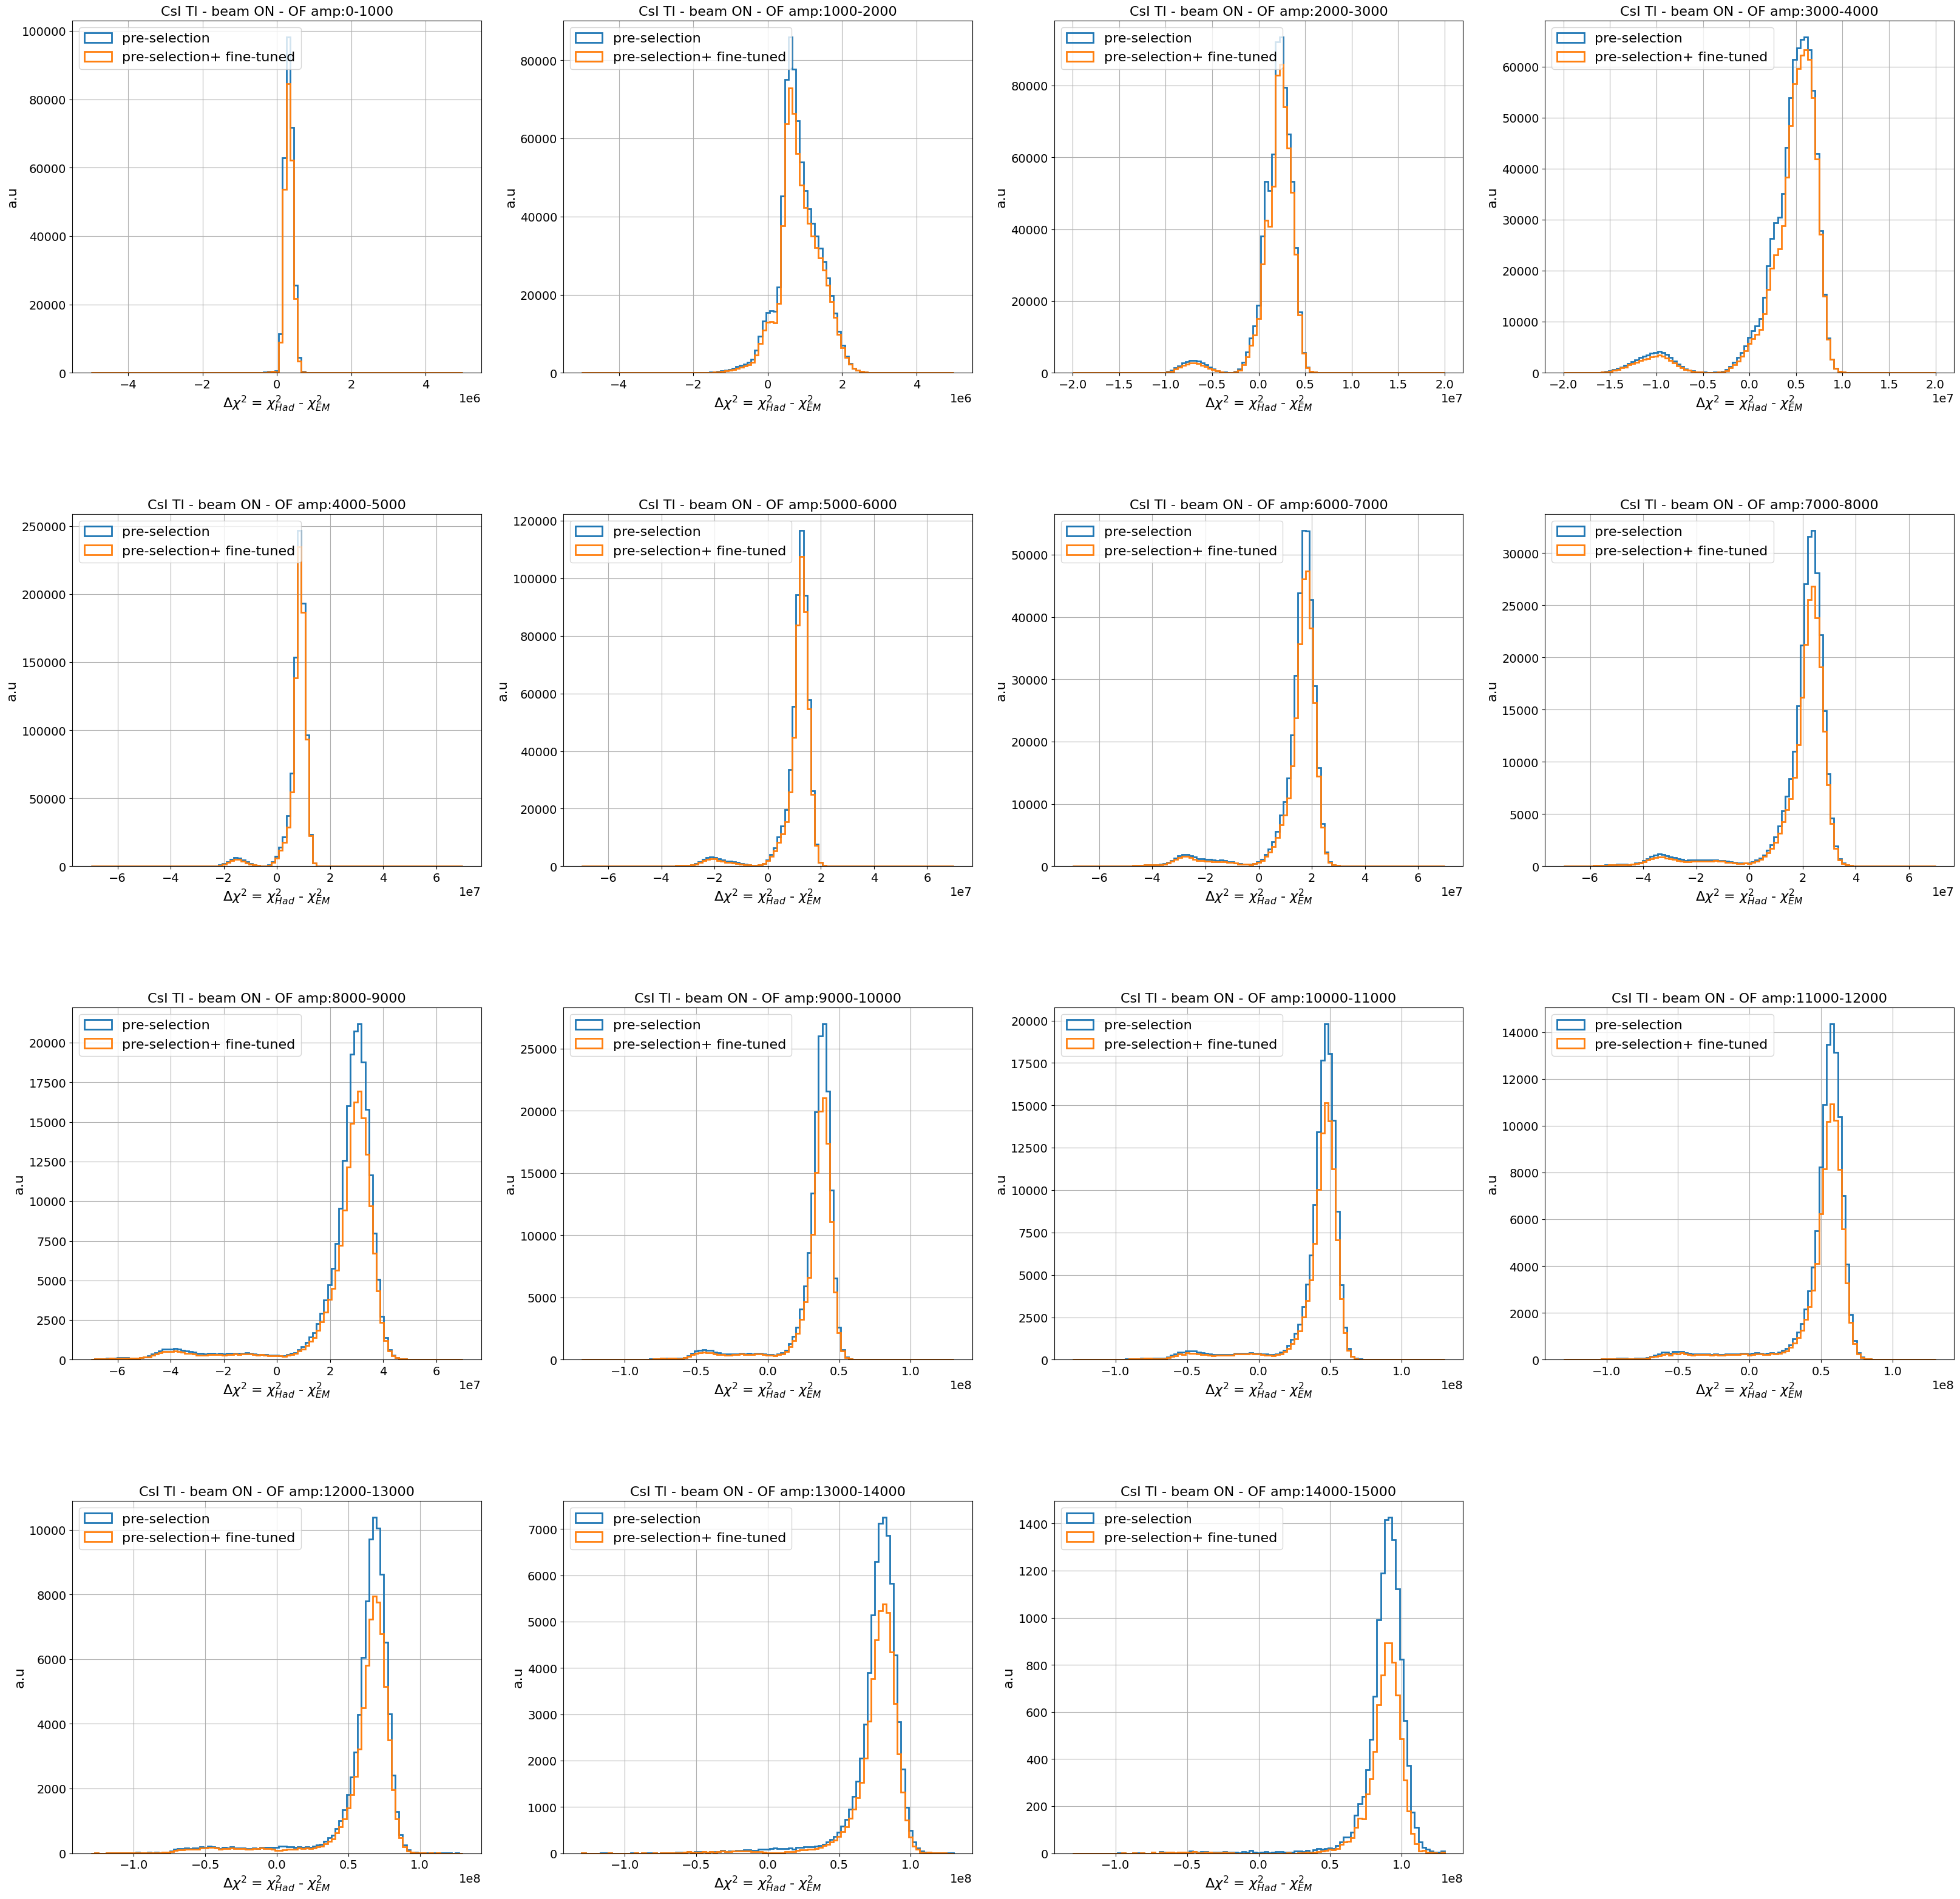

In [59]:



# slices=np.arange(0,15000,1000)
# fig, ax = plt.subplots(4, 4, figsize=(40,40))
# ax = ax.flatten()
# ax[-1].axis('off')#; ax[-2].axis('off')
# for i, s in enumerate(slices):
#     sl = [i for i, x in enumerate(Tl.amp_EM_PS) if x>s and x<s+1000]
#     bins = np.linspace(-1e8,1e8,100)
#     if s  < 2000: bins = np.linspace(-0.05e8,0.05e8,100)
#     elif s  < 4000: bins = np.linspace(-0.2e8,0.2e8,100)
#     elif s  < 9000: bins = np.linspace(-0.7e8,0.7e8,100)
#     else: bins = np.linspace(-1.3e8,1.3e8,100)
#     weights = np.ones_like(np.take(Tl.deltachi2_PS,sl))/len(np.take(Tl.deltachi2_PS,sl))
#     ax[i].hist(np.take(Tl.deltachi2_PS,sl), bins =bins,  histtype = 'step', linewidth = 2, label = 'pre-selection')
#     sl = [i for i, x in enumerate(Tl.amp_EM_PS_FT) if x>s and x<s+1000]
#     weights = np.ones_like(np.take(Tl.deltachi2_PS_FT,sl))/len(np.take(Tl.deltachi2_PS_FT,sl))
#     ax[i].hist(np.take(Tl.deltachi2_PS_FT,sl), bins =bins,  histtype = 'step', linewidth = 2, label = 'pre-selection+ fine-tuned')
#     ax[i].set_title('CsI Tl - beam ON - OF amp:'+str(s)+'-'+str(s+1000))
#     ax[i].set_xlabel(r'$\Delta\chi^2$ = $\chi^2_{Had}$ - $\chi^2_{EM}$')
#     ax[i].set_ylabel('a.u')
#     ax[i].grid()
#     ax[i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#     ax[i].legend(loc = 'upper left')
# plt.show()


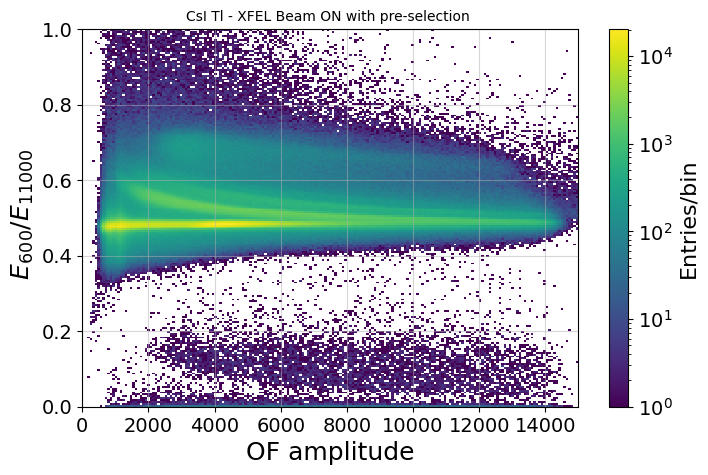

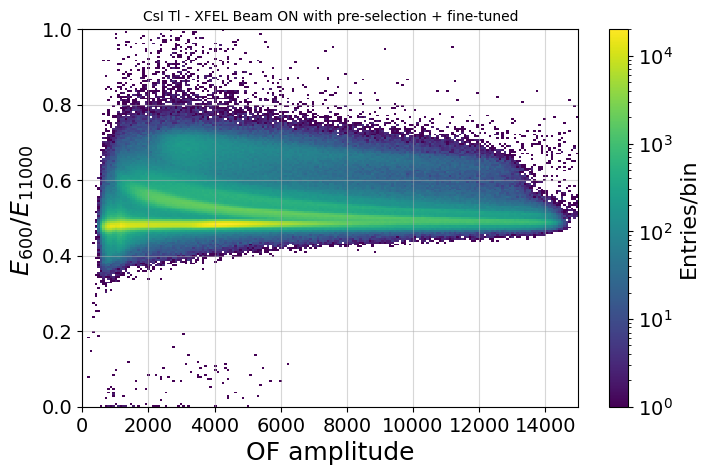

peak memory: 3870.50 MiB, increment: 166.09 MiB


In [5]:
%%memit
plt.figure(figsize=(8, 5))
plt.hist2d(Tl.amp_EM_PS , Tl.CR_PS ,bins=(np.linspace(0,15000,200), np.linspace(0,1,200)), cmin=1, norm=LogNorm())
plt.xlabel(r'OF amplitude',fontsize=18)
plt.ylabel(r' $E_{600}/E_{11000}$',fontsize=18)
plt.grid(alpha=0.5)
plt.title('CsI Tl - XFEL Beam ON with pre-selection ',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries/bin')
plt.show()

plt.figure(figsize=(8, 5))
plt.hist2d(Tl.amp_EM_PS_FT , Tl.CR_PS_FT ,bins=(np.linspace(0,15000,200), np.linspace(0,1,200)), cmin=1, norm=LogNorm())
plt.xlabel(r'OF amplitude',fontsize=18)
plt.ylabel(r'  $E_{600}/E_{11000}$',fontsize=18)
plt.grid(alpha=0.5)
plt.title('CsI Tl - XFEL Beam ON with pre-selection + fine-tuned',fontsize=10)
cbar = plt.colorbar()
cbar.set_label('Entries/bin')
plt.show()


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


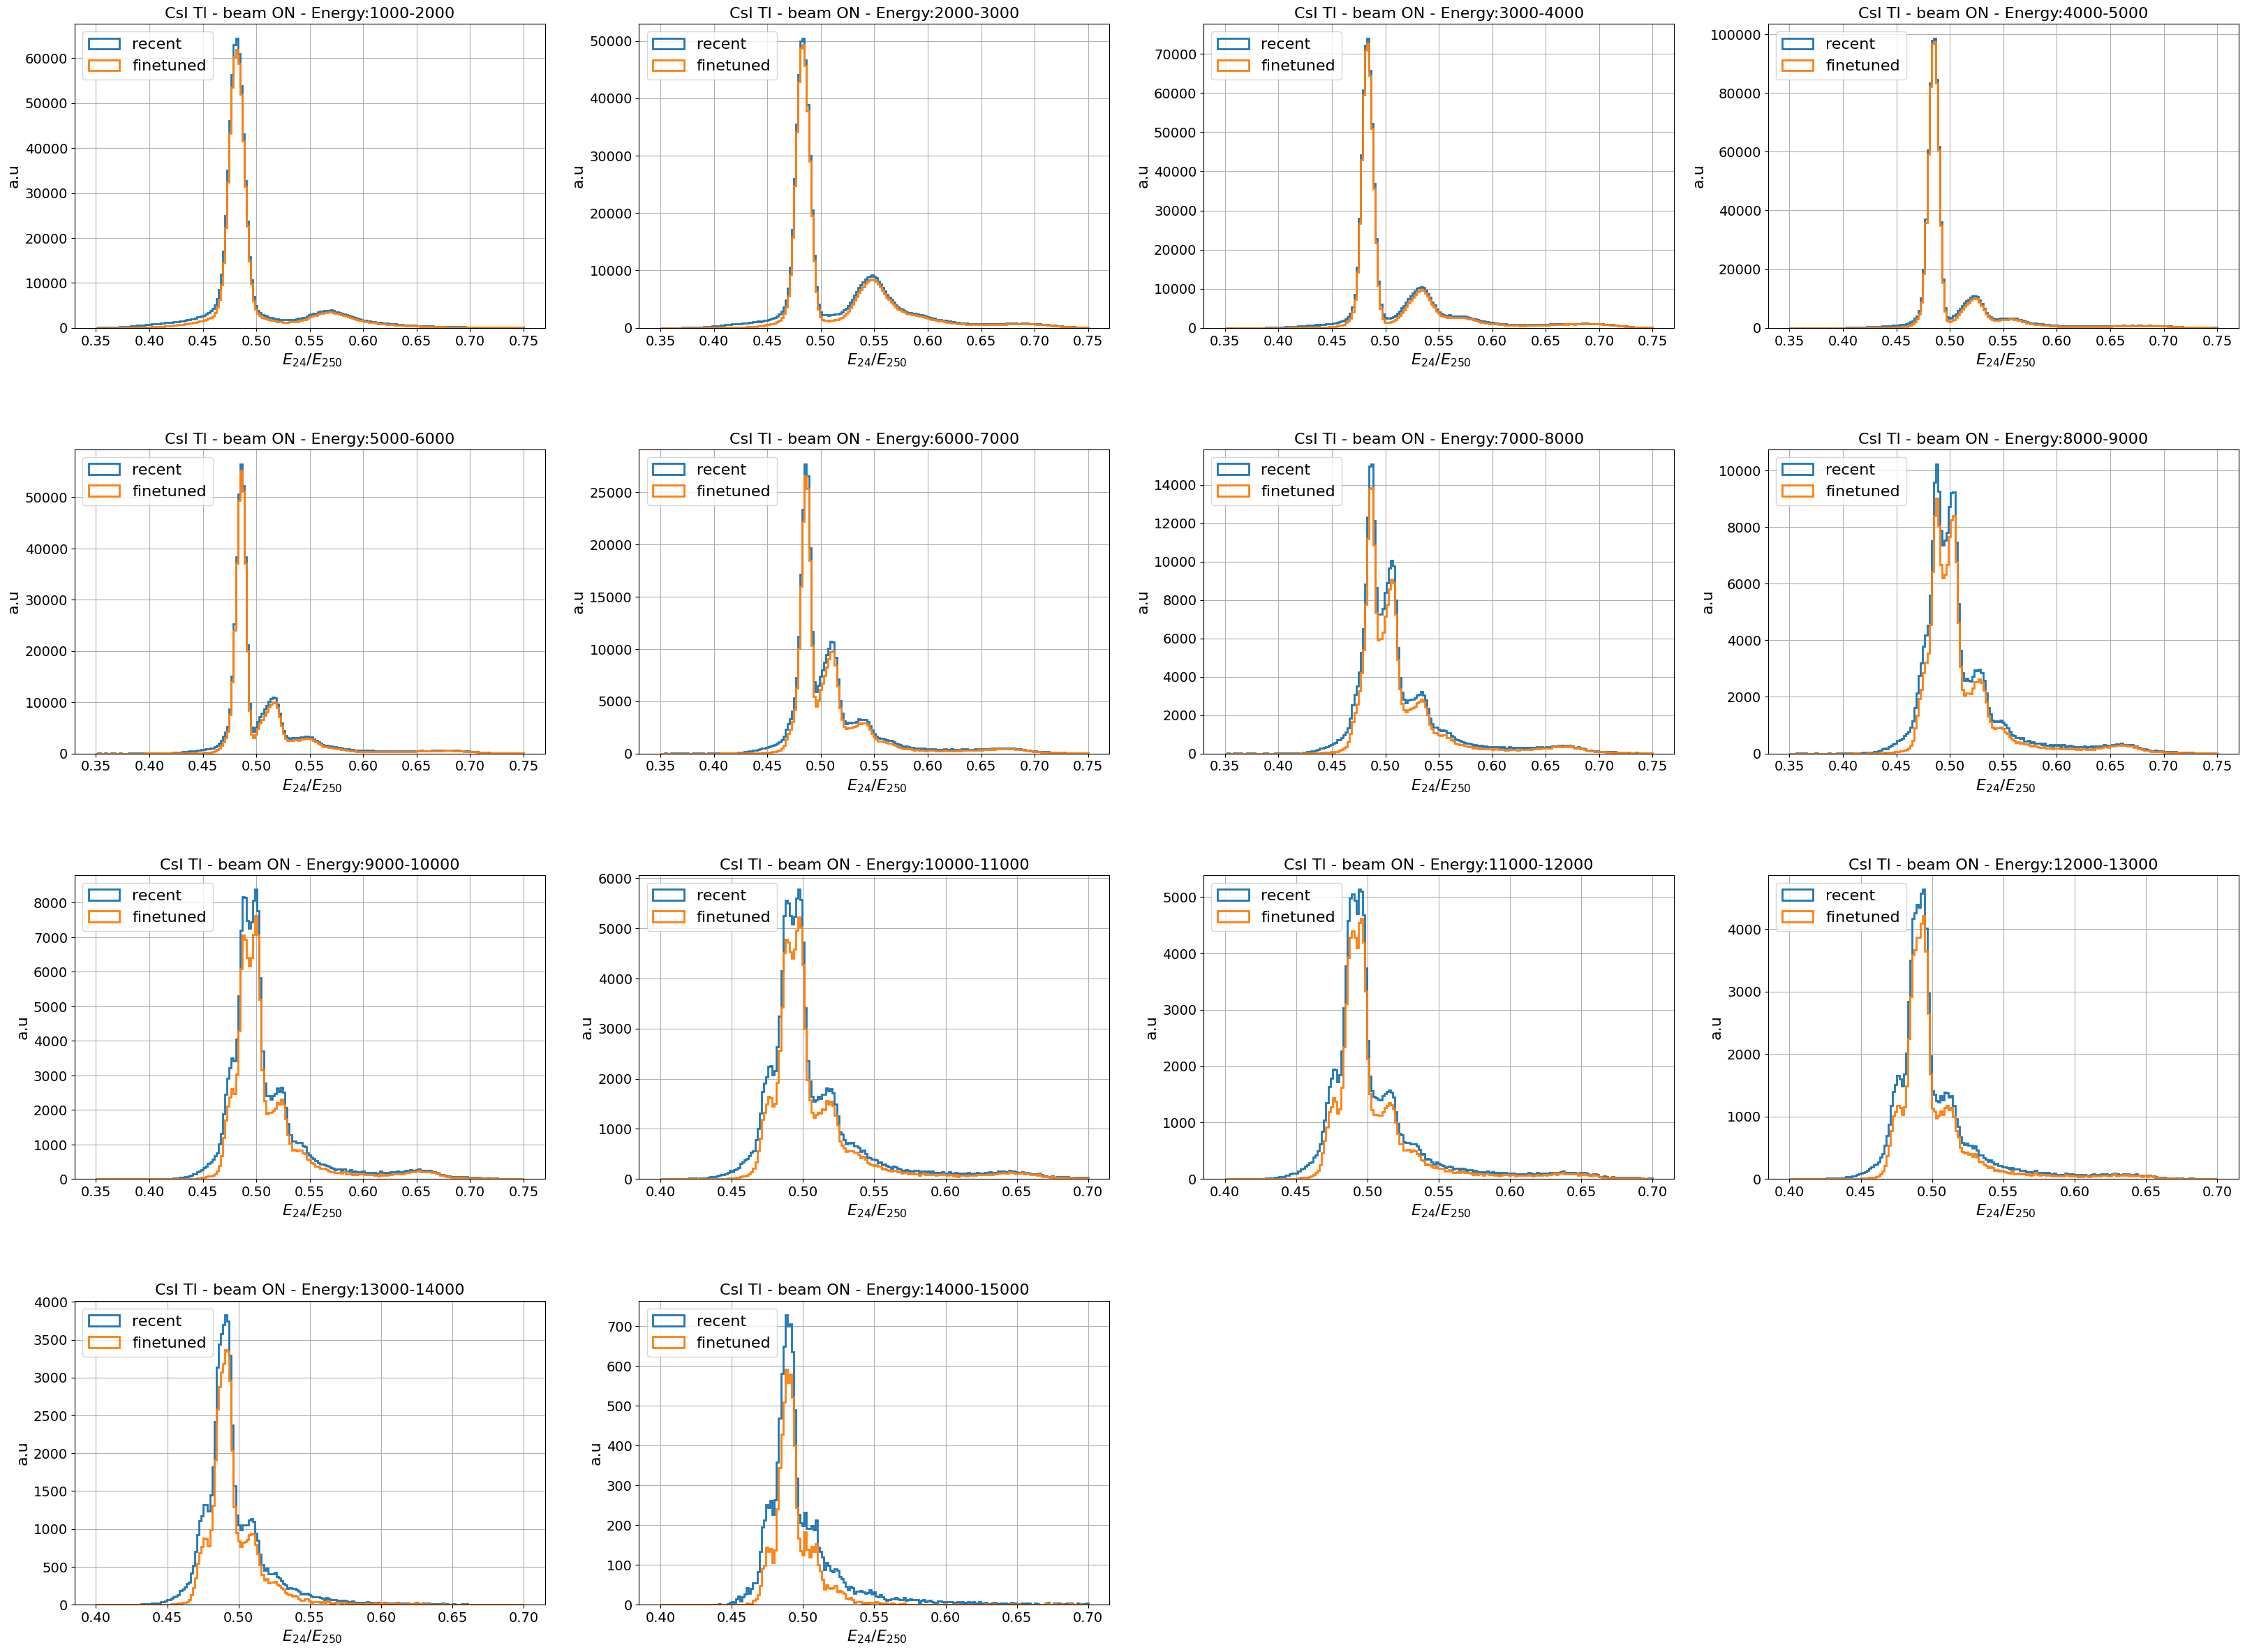

In [11]:


# slices=np.arange(1000,15000,1000)
# fig, ax = plt.subplots(4, 4, figsize=(40,30))
# ax = ax.flatten()
# ax[-1].axis('off'); ax[-2].axis('off')
# for i, s in enumerate(slices):
#     sl = [i for i, x in enumerate(Tl.amp_EM_PS) if x>s and x<s+1000]
#     bins = np.linspace(0.35, 0.75,200)
# #     if s  < 4000: bins = np.linspace(-0.3e8,0.3e8,100)
#     if s  > 9000: bins = np.linspace(0.4, 0.7,200)
# #     else: bins = np.linspace(-1.3e8,1.3e8,100)
#     weights = np.ones_like(np.take(Tl.CR_PS,sl))/len(np.take(Tl.CR_PS,sl))
#     ax[i].hist(np.take(Tl.CR_PS,sl), bins =bins,  histtype = 'step', linewidth = 2, label = 'recent')
#     sl = [i for i, x in enumerate(Tl.amp_EM_PS_FT) if x>s and x<s+1000]
#     weights = np.ones_like(np.take(Tl.CR_PS_FT,sl))/len(np.take(Tl.CR_PS_FT,sl))
#     ax[i].hist(np.take(Tl.CR_PS_FT,sl), bins =bins,  histtype = 'step', linewidth = 2, label = 'finetuned')
#     ax[i].set_title('CsI Tl - beam ON - Energy:'+str(s)+'-'+str(s+1000))
#     ax[i].set_xlabel(r' $E_{24}/E_{250}$')
#     ax[i].set_ylabel('a.u')
#     ax[i].grid()
#     ax[i].legend(loc = 'upper left')
# plt.show()

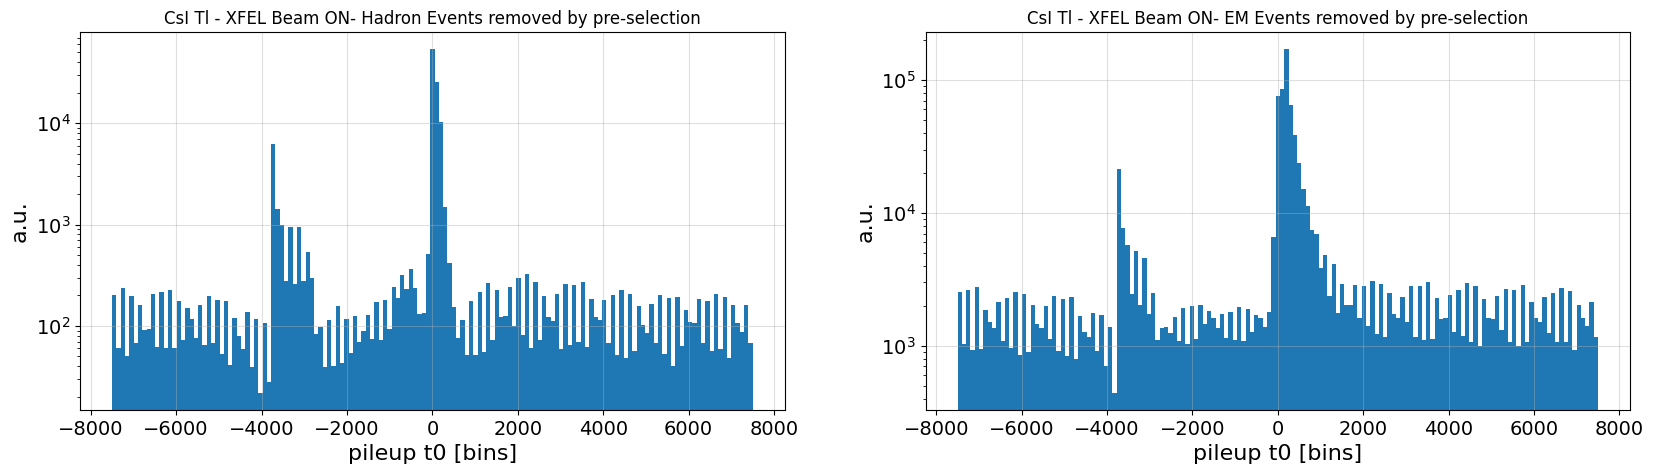

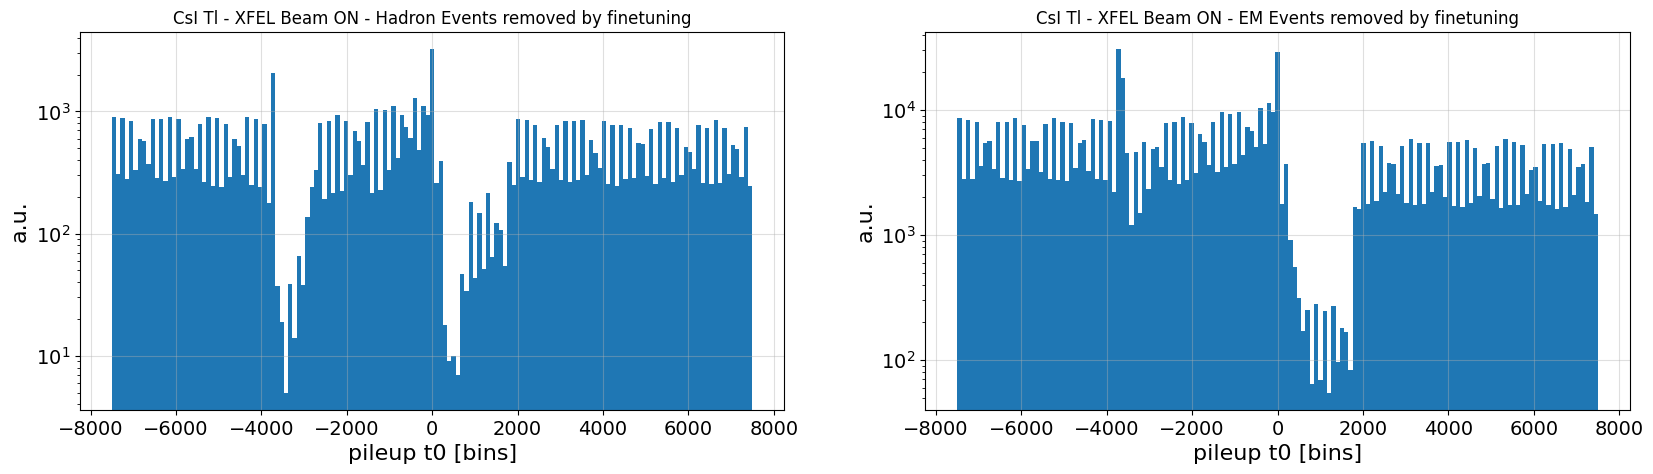

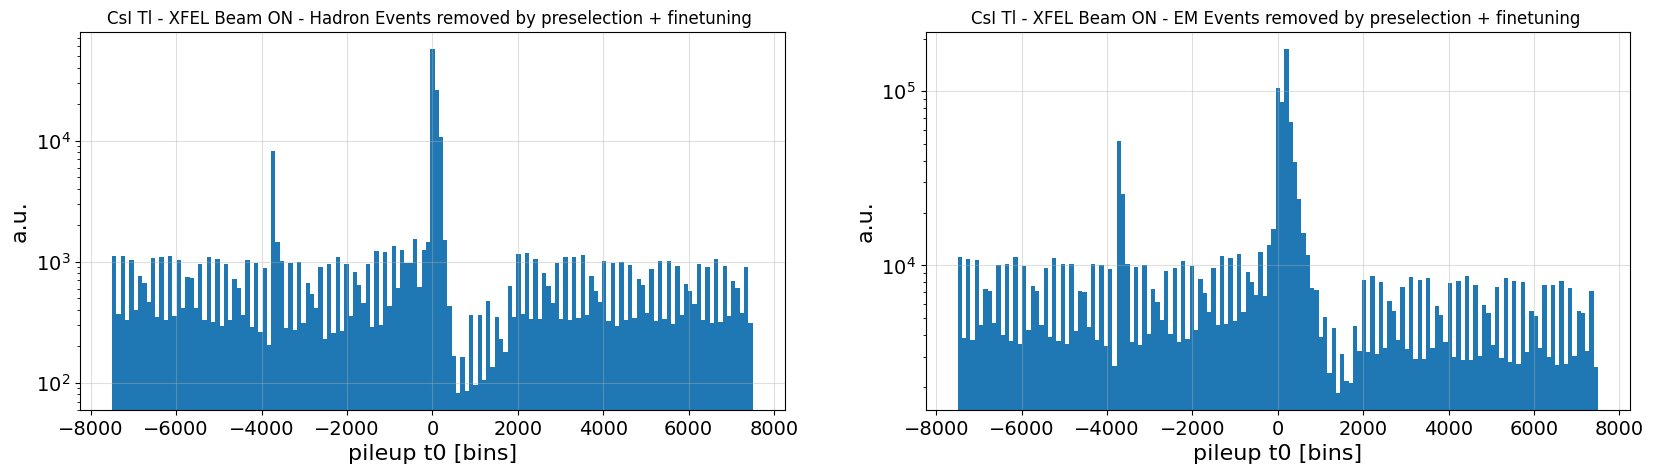

In [6]:



ln = [i for i, x in enumerate(Tl.deltachi2_PS_removed) if x<0]
lp = [i for i, x in enumerate(Tl.deltachi2_PS_removed) if x>0]
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
plt.hist(np.take(Tl.t0pil_Had_PS_removed*fs, ln), bins =np.linspace(-7500,7500,150))
plt.yscale('log')
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON- Hadron Events removed by pre-selection', fontsize = 12)
plt.subplot(2,2,2)
plt.hist(np.take(Tl.t0pil_EM_PS_removed*fs,lp), bins =np.linspace(-7500,7500,150))
plt.yscale('log')
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON- EM Events removed by pre-selection', fontsize = 12)
plt.savefig('../../../plots/beamON/t0pileup_Tl_XFEL_BeamON_PS_removed_log.png',bbox_inches = 'tight')
plt.show()
ln = [i for i, x in enumerate(Tl.deltachi2_FT_removed) if x<0]
lp = [i for i, x in enumerate(Tl.deltachi2_FT_removed) if x>0]
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
plt.hist(np.take(Tl.t0pil_Had_FT_removed*fs, ln), bins =np.linspace(-7500,7500,150))
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
plt.yscale('log')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON - Hadron Events removed by finetuning', fontsize = 12)
plt.subplot(2,2,2)
plt.hist(np.take(Tl.t0pil_EM_FT_removed*fs,lp), bins =np.linspace(-7500,7500,150))
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
plt.yscale('log')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON - EM Events removed by finetuning', fontsize = 12)
plt.savefig('../../../plots/beamON/t0pileup_Tl_XFEL_BeamON_FT_removed_log.png',bbox_inches = 'tight')
plt.show()
ln = [i for i, x in enumerate(Tl.deltachi2_PS_FT_removed) if x<0]
lp = [i for i, x in enumerate(Tl.deltachi2_PS_FT_removed) if x>0]
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
plt.hist(np.take(Tl.t0pil_Had_PS_FT_removed*fs, ln), bins =np.linspace(-7500,7500,150))
plt.yscale('log')
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON - Hadron Events removed by preselection + finetuning ', fontsize = 12)
plt.subplot(2,2,2)
plt.hist(np.take(Tl.t0pil_EM_PS_FT_removed*fs,lp), bins =np.linspace(-7500,7500,150))
plt.yscale('log')
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON - EM Events removed by preselection + finetuning ', fontsize = 12)
plt.savefig('../../../plots/beamON/t0pileup_Tl_XFEL_BeamON_PS_FT_removed_log.png',bbox_inches = 'tight')
plt.show()

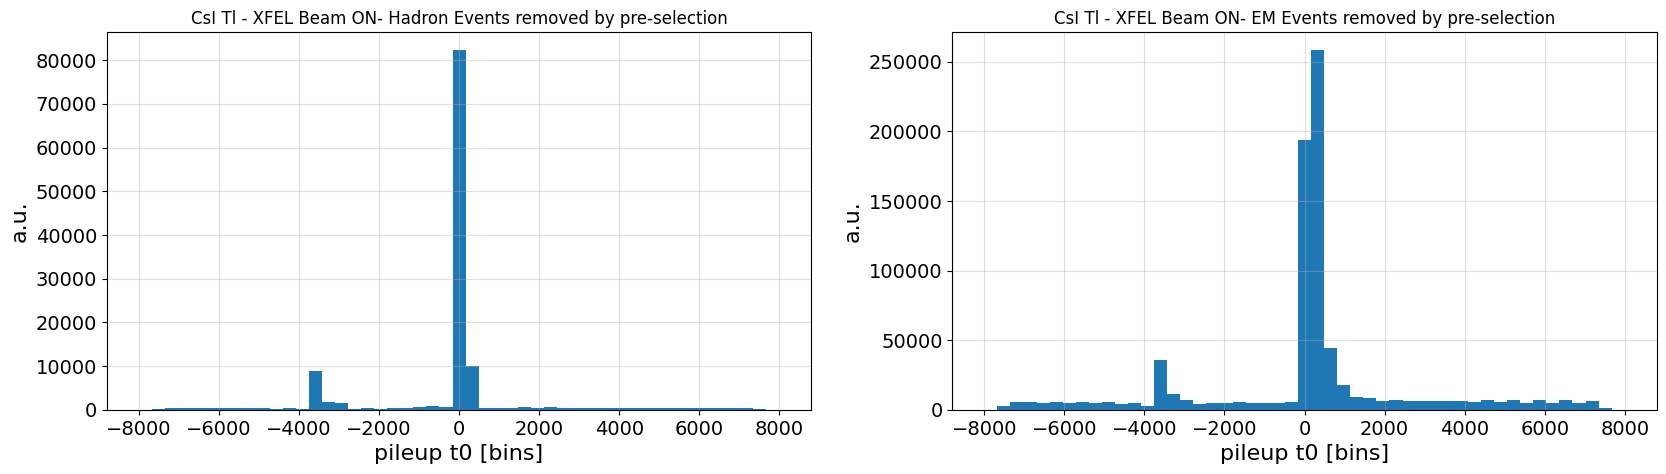

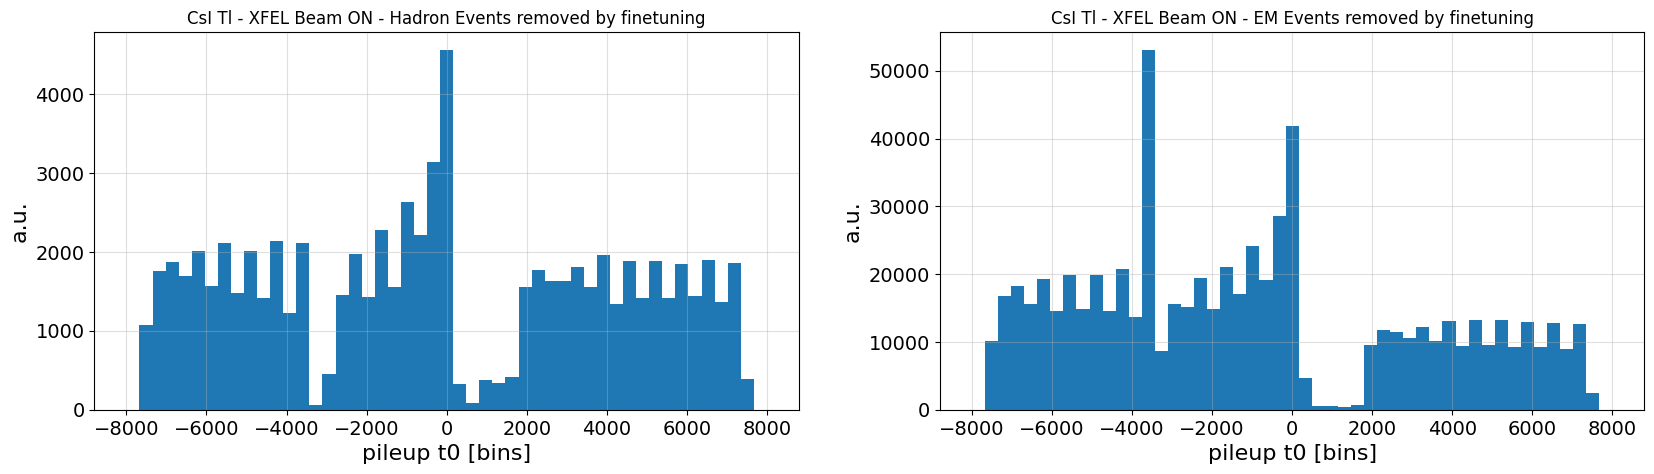

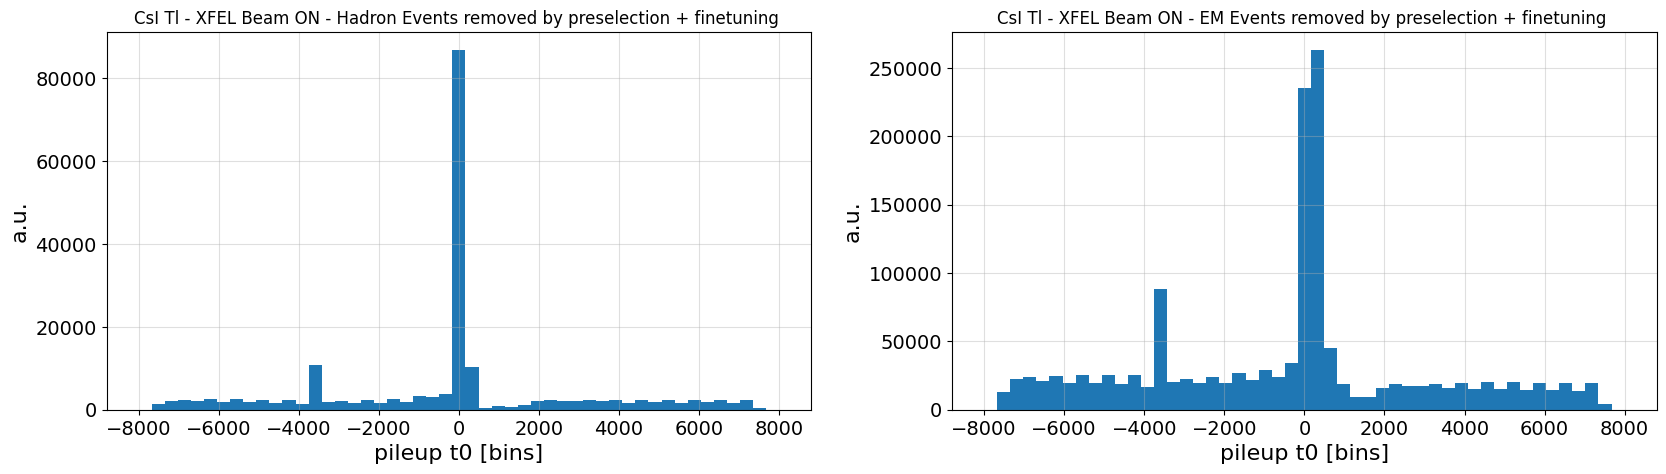

In [7]:




ln = [i for i, x in enumerate(Tl.deltachi2_PS_removed) if x<0]
lp = [i for i, x in enumerate(Tl.deltachi2_PS_removed) if x>0]
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
plt.hist(np.take(Tl.t0pil_Had_PS_removed*fs, ln), bins =np.linspace(-8000,8000,50))
# plt.yscale('log')
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON- Hadron Events removed by pre-selection', fontsize = 12)
plt.subplot(2,2,2)
plt.hist(np.take(Tl.t0pil_EM_PS_removed*fs,lp), bins =np.linspace(-8000,8000,50))
# plt.yscale('log')
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON- EM Events removed by pre-selection', fontsize = 12)
plt.savefig('../../../plots/beamON/t0pileup_Tl_XFEL_BeamON_PS_removed.png',bbox_inches = 'tight')
plt.show()
ln = [i for i, x in enumerate(Tl.deltachi2_FT_removed) if x<0]
lp = [i for i, x in enumerate(Tl.deltachi2_FT_removed) if x>0]
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
plt.hist(np.take(Tl.t0pil_Had_FT_removed*fs, ln), bins =np.linspace(-8000,8000,50))
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
# plt.yscale('log')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON - Hadron Events removed by finetuning', fontsize = 12)
plt.subplot(2,2,2)
plt.hist(np.take(Tl.t0pil_EM_FT_removed*fs,lp), bins =np.linspace(-8000,8000,50))
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
# plt.yscale('log')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON - EM Events removed by finetuning', fontsize = 12)
plt.savefig('../../../plots/beamON/t0pileup_Tl_XFEL_BeamON_FT_removed.png',bbox_inches = 'tight')
plt.show()
ln = [i for i, x in enumerate(Tl.deltachi2_PS_FT_removed) if x<0]
lp = [i for i, x in enumerate(Tl.deltachi2_PS_FT_removed) if x>0]
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
plt.hist(np.take(Tl.t0pil_Had_PS_FT_removed*fs, ln), bins =np.linspace(-8000,8000,50))
# plt.yscale('log')
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON - Hadron Events removed by preselection + finetuning ', fontsize = 12)
plt.subplot(2,2,2)
plt.hist(np.take(Tl.t0pil_EM_PS_FT_removed*fs,lp), bins =np.linspace(-8000,8000,50))
# plt.yscale('log')
plt.xlabel('pileup t0 [bins]')
plt.ylabel('a.u.')
plt.grid(alpha = 0.4)
plt.title('CsI Tl - XFEL Beam ON - EM Events removed by preselection + finetuning ', fontsize = 12)
plt.savefig('../../../plots/beamON/t0pileup_Tl_XFEL_BeamON_PS_FT_removed.png',bbox_inches = 'tight')
plt.show()


In [ ]:
l , m = [], []
for n in range (len (Tl.amp_EM_PS_FT_removed)):
    if Tl.amp_EM_PS_FT_removed[n]>13900 and Tl.amp_EM_PS_FT_removed[n]<14000:
        l.append(n)
        
for i in l:        
    if Tl.deltachi2_PS_FT_removed[i]>-0.1e8 and Tl.deltachi2_PS_FT_removed[i]<-0.01e8:
        m.append(i)
print(len(l), len(m))

In [8]:
%%memit
j = random.sample(m, 5)
tem_arr = []
for n in range(len(j)):    
    wavenum = Tl.waveform_number_PS_FT_removed[j][n]-1
    print(Tl.t0pil_Had_PS_FT_removed[j][n]*fs,  Tl.amppil_Had_PS_FT_removed[j][n],   Tl.chi2pil_Had_PS_FT_removed[j][n]/1e7)
    print(Tl.t0pil_EM_PS_FT_removed[j][n]*fs,  Tl.amppil_EM_PS_FT_removed[j][n],   Tl.chi2pil_EM_PS_FT_removed[j][n]/1e7)

    print(Tl.rundata_PS_FT_removed[j][n].decode('utf-8'),  Tl.chi2_Had_PS_FT_removed[j][n]/15000)
    if Tl.rundata_PS_FT_removed[j][n].decode('utf-8')[12:17] == 'XFEL0': 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+Tl.rundata_PS_FT_removed[j][n].decode('utf-8')[12:18]+'/'
        chunks = pd.read_csv(infolder+Tl.rundata_PS_FT_removed[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)
    else: 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+Tl.rundata_PS_FT_removed[j][n].decode('utf-8')[12:23]+'/'
        chunks = pd.read_csv(infolder+Tl.rundata_PS_FT_removed[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)

    trace_3 = chunks.get_chunk(15000).values.reshape( 15000, 1)
    trace_3 = trace_3.T-np.expand_dims(trace_3[100:1000,:].mean(axis=0), axis=0).T
    print (np.sum(trace_3/np.min(trace_3, axis =1), axis =1))
    print (integrate.trapz(y = trace_3, dx = 1)/np.min(trace_3, axis =1))
    print(trace_3.shape, min(trace_3[0]))
    plt.scatter(np.arange(15000), trace_3[0], label='Signal %s'%m[n], color='blue', marker = '.' , alpha=0.5, s =2)
    plt.plot(np.arange(15000), Tl.amp_Had_PS_FT_removed[j][n]*np.roll(TemplateHAD_Tl, round(Tl.t0_Had_PS_FT_removed[j][n]*(1/2e-9)))+Tl.amppil_Had_PS_FT_removed[j][n]*np.roll(TemplateHAD_Tl, round(Tl.t0pil_Had_PS_FT_removed[j][n]*(1/2e-9))),  
            label='Hadron fit ', color='red',linewidth ='1.5')#, linestyle='dotted')
    plt.plot(np.arange(15000), Tl.amp_EM_PS_FT_removed[j][n]*np.roll(TemplateEM_Tl, round(Tl.t0_EM_PS_FT_removed[j][n]*(1/2e-9)))+Tl.amppil_EM_PS_FT_removed[j][n]*np.roll(TemplateEM_Tl, round(Tl.t0pil_EM_PS_FT_removed[j][n]*(1/2e-9))),  
            label='EM fit ', color='green',linewidth ='1.5')#, linestyle='dotted')
    plt.ylabel(r'Light output [ADC]',fontsize = 16)
    plt.xlabel(r'Time [$\mu$s]',fontsize = 16)
    plt.title('CsI Tl - XFEL Beam ON',fontsize = 16)
    plt.tick_params(which='both', direction='in', right=True, top=True)
    plt.legend(loc = 'lower right', fontsize =16)
#     plt.xlim(3000,5000)
    plt.grid(linestyle='dotted')
    plt.minorticks_on()
    plt.show()



/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndexError: index 3952961 is out of bounds for axis 0 with size 1661914

In [ ]:
lp = [Tl.chi2_EM_PS_FT[i]/Tl.chi2pil_EM_PS_FT[i] for i in range(len(Tl.deltachi2_PS_FT)) if Tl.deltachi2_PS_FT[i]>0]
ln = [Tl.chi2_Had_PS_FT[i]/Tl.chi2pil_Had_PS_FT[i] for i in range(len(Tl.deltachi2_PS_FT)) if Tl.deltachi2_PS_FT[i]<0]

In [ ]:
plt.hist(lp, bins =np.linspace(0.8,1.25, 100))
plt.show()
plt.hist(ln, bins =np.linspace(0.8,1.5, 100))
plt.show()

In [22]:
l , m = [], []
for i in range (len (Tl.deltachi2_PS_FT)):
    if Tl.deltachi2_PS_FT[i]<-0.25e8:
        l.append(i)
print(len(l))

        
for i in l:        
    if Tl.amp_EM_PS_FT[i]>8000:
        m.append(i)
print(len(l), len(m))








# l , m = [], []
# for n in range (len (Tl.amp_EM_PS_FT)):
#     if Tl.amp_EM_PS_FT[n]>500 and Tl.amp_EM_PS_FT[n]<15000:
#         l.append(n)
        
# # for i in l:        
# #     if Tl.t0pil_Had_PS_FT[i]<0  and abs(Tl.amppil_Had_PS_FT[i]) < 40 and Tl.deltachi2_PS_FT[i]<-0.01e8 :
# #         m.append(i)
# # print(len(l), len(m))
# for i in l:        
#     if Tl.t0pil_EM_PS_FT[i]<0  and abs(Tl.amppil_EM_PS_FT[i]) >1000 and Tl.deltachi2_PS_FT[i]>0.01e8 :
#         m.append(i)
# print(len(l), len(m))

# # for i in l:        
# #     if Tl.chi2_Had_PS_FT[i]/15000>2000  and Tl.deltachi2_PS_FT[i]<0:
# #         m.append(i)
# # print(len(l), len(m))

# # for i in l:        
# #     if Tl.chi2_EM_PS_FT[i]/Tl.chi2pil_EM_PS_FT[i]>1.2 and Tl.deltachi2_PS_FT[i]>0:
# #         m.append(i)
# # print(len(l), len(m))      
# # for i in l:        
# #     if Tl.chi2pil_EM_PS_FT[i]/1e7>5 and  Tl.chi2pil_EM_PS_FT[i]/1e7<6and Tl.deltachi2_PS_FT[i]>0:
# #         m.append(i)
# # print(len(l), len(m))

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


49948
49948 26966


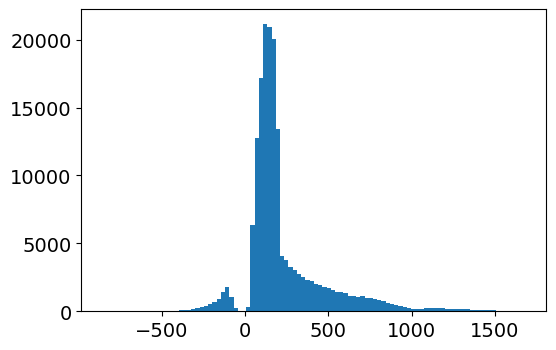

In [49]:
plt.hist(np.take(Tl.amppil_EM_PS_FT, m), bins = 100)
# plt.xlim(0,50)
plt.show()

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Had 71.0 231.39637683885576 2.001448164199999
EM 151.0 -1474.7483714444847 4.454237767627822
ratio 1.5440081416965505
wavedump_Tl_XFEL07_21-07-29_08-58-26 1275.6322133944034
[494.68594916]
[494.68611863]
(1, 15000) -13204.762222222222


<string>:11: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL06/wavedump_Tl_XFEL06_21-07-27_02-38-37.txt' mode='r' encoding='utf-8'>


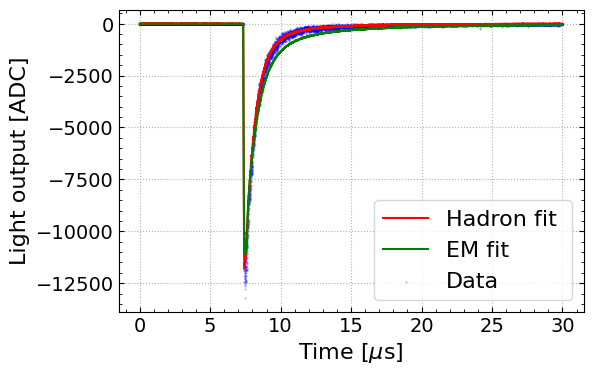

Had 106.0 268.30436573988936 1.7203598098770205
EM 153.0 -1076.9815591664715 3.2556691354845078
ratio 1.3804220483507732
wavedump_Tl_XFEL04_21-07-18_20-33-50 1151.241538148745
[728.76958562]
[728.7667964]
(1, 15000) -4691.084444444445


<string>:11: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL07/wavedump_Tl_XFEL07_21-07-29_08-58-26.txt' mode='r' encoding='utf-8'>


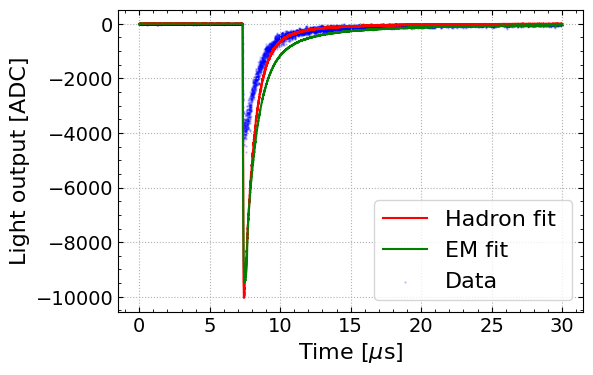

Had 162.0 197.80159959528328 1.2534134825029855
EM 216.0 -1010.7845575870667 2.9348555842301933
ratio 1.387858582407756
wavedump_Tl_XFEL04_21-07-17_04-55-12 862.1679839975675


<string>:11: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL04/wavedump_Tl_XFEL04_21-07-18_20-33-50.txt' mode='r' encoding='utf-8'>


[502.44608111]
[502.44688987]
(1, 15000) -9795.577777777778


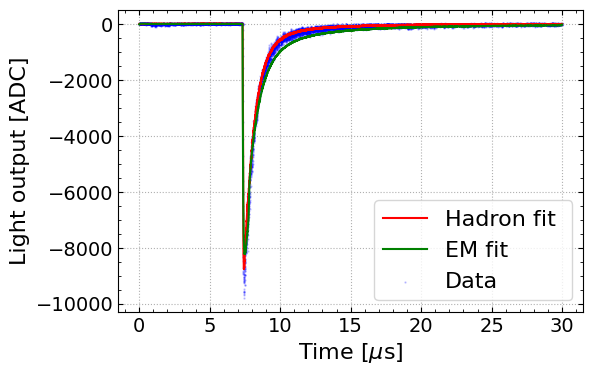

Had 183.0 538.4893471696128 2.2263451326359607
EM 141.0 -1285.7402838750122 4.212179184716279
ratio 1.4372628786125659
wavedump_Tl_XFELtesting_21-07-09_23-26-22 1608.1406029465356
[566.93398685]
[566.93277038]
(1, 15000) -13649.604444444445


<string>:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL04/wavedump_Tl_XFEL04_21-07-17_04-55-12.txt' mode='r' encoding='utf-8'>


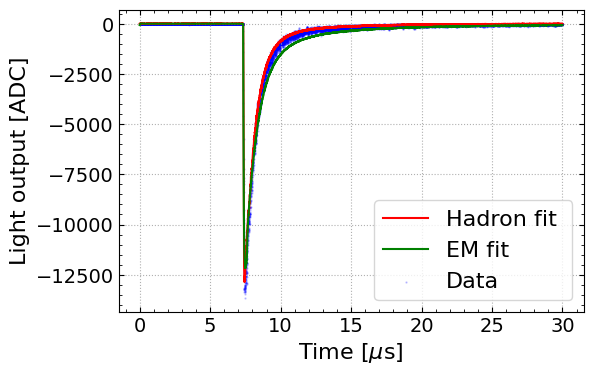

Had 268.0 -121.65683249514757 1.5374634367095505
EM 261.0 -1196.440565585115 3.532256904928118
ratio 1.4418551883507793
wavedump_Tl_XFEL07_21-07-30_16-32-15 983.4980250307003
[492.46232764]
[492.46136738]
(1, 15000) -10381.468888888889


<string>:11: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFELtesting/wavedump_Tl_XFELtesting_21-07-09_23-26-22.txt' mode='r' encoding='utf-8'>


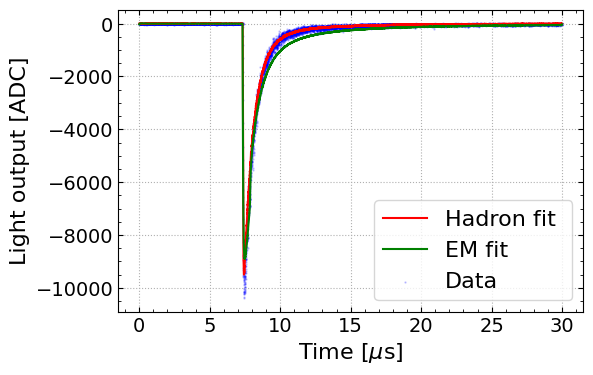

Had 271.0 159.24223436699685 1.7996775577888737
EM 198.0 -1438.360203033335 4.9168690295997335
ratio 1.4567129453533314
wavedump_Tl_XFEL07_21-07-30_21-35-16 1150.3649819993814


<string>:11: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL07/wavedump_Tl_XFEL07_21-07-30_16-32-15.txt' mode='r' encoding='utf-8'>


[493.76164601]
[493.76171053]
(1, 15000) -13364.137777777778


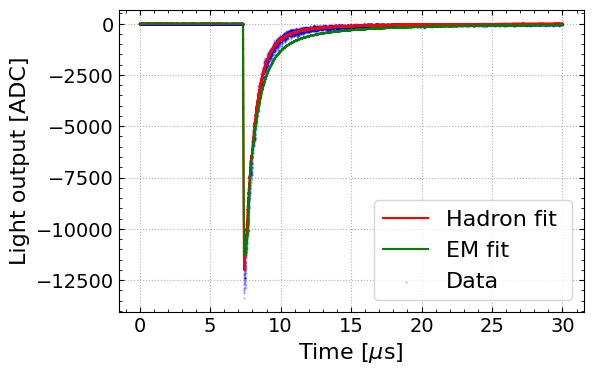

Had 113.0 -504.293271569215 1.5733199236974544
EM 163.0 -1712.264608294924 5.538917819976386
ratio 1.5897389110447644
wavedump_Tl_XFEL05_21-07-20_18-21-39 1221.5107942809423
[392.97327143]
[392.97357888]
(1, 15000) -12041.797777777778


<string>:11: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL07/wavedump_Tl_XFEL07_21-07-30_21-35-16.txt' mode='r' encoding='utf-8'>


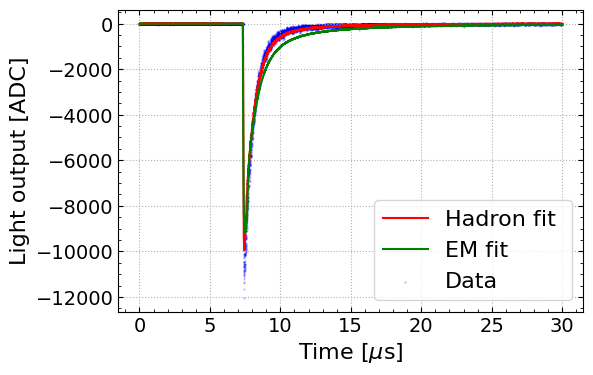

Had 79.0 -400.97288045266123 1.4326886933556497
EM 158.0 -1454.878758575032 4.594290103253124
ratio 1.5133081222809677
wavedump_Tl_XFEL05_21-07-21_15-19-09 1064.2653182463646
[445.3192597]
[445.31742147]
(1, 15000) -10528.854444444445


<string>:11: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL05/wavedump_Tl_XFEL05_21-07-20_18-21-39.txt' mode='r' encoding='utf-8'>


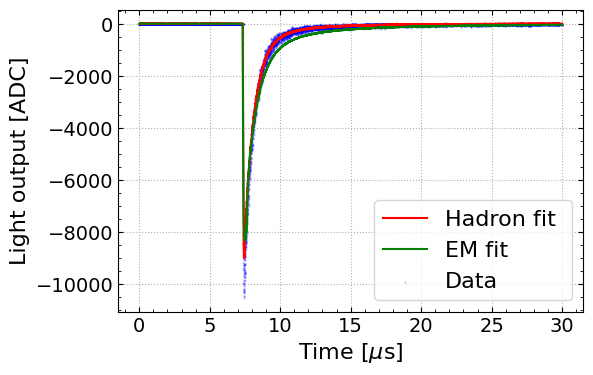

Had 97.0 -235.93981509739842 1.26327375472303
EM 161.0 -1263.3023019733268 3.580048378625688
ratio 1.4966707960428767
wavedump_Tl_XFEL06_21-07-26_23-36-48 879.9705564050436
[468.69448953]
[468.6931603]
(1, 15000) -10382.801111111112


<string>:11: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL05/wavedump_Tl_XFEL05_21-07-21_15-19-09.txt' mode='r' encoding='utf-8'>


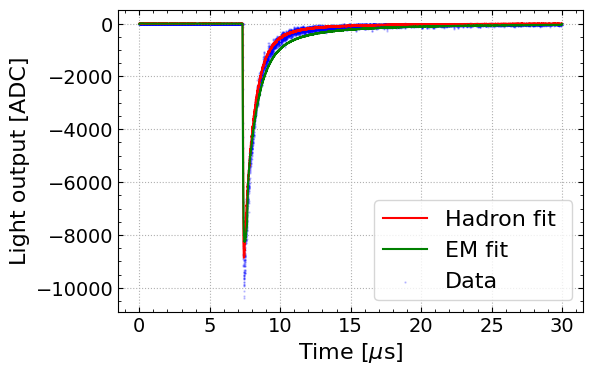

Had 148.0 225.8736774475692 1.503543422426049
EM 184.0 -1068.817034365008 3.110488305822346
ratio 1.4091863197736636
wavedump_Tl_XFELtesting_21-07-10_07-26-58 977.6764962866306
[502.00162646]
[501.9993365]
(1, 15000) -10938.548888888889


<string>:14: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/XFEL06/wavedump_Tl_XFEL06_21-07-26_23-36-48.txt' mode='r' encoding='utf-8'>


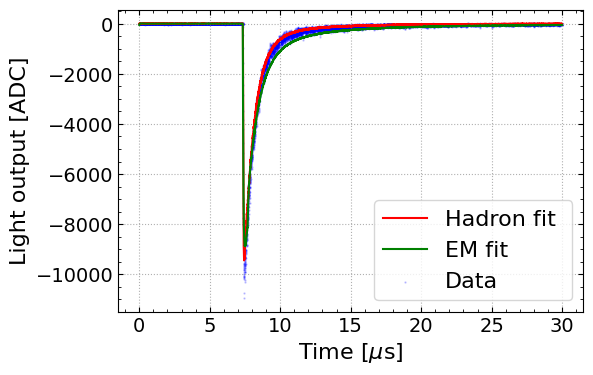

peak memory: 3685.91 MiB, increment: 0.35 MiB


In [25]:
%%memit
j = random.sample(m, 10)
tem_arr = []
for n in range(len(j)):    
    wavenum = Tl.waveform_number_PS_FT[j][n]-1
    print('Had', Tl.t0pil_Had_PS_FT[j][n]*fs,  Tl.amppil_Had_PS_FT[j][n],   Tl.chi2pil_Had_PS_FT[j][n]/1e7)
    print('EM', Tl.t0pil_EM_PS_FT[j][n]*fs,  Tl.amppil_EM_PS_FT[j][n],   Tl.chi2pil_EM_PS_FT[j][n]/1e7)
    print('ratio', Tl.chi2_EM_PS_FT[j][n]/Tl.chi2pil_EM_PS_FT[j][n])
    print(Tl.rundata_PS_FT[j][n].decode('utf-8'),  Tl.chi2_Had_PS_FT[j][n]/15000)
    if Tl.rundata_PS_FT[j][n].decode('utf-8')[12:17] == 'XFEL0': 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+Tl.rundata_PS_FT[j][n].decode('utf-8')[12:18]+'/'
        chunks = pd.read_csv(infolder+Tl.rundata_PS_FT[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)
    else: 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+Tl.rundata_PS_FT[j][n].decode('utf-8')[12:23]+'/'
        chunks = pd.read_csv(infolder+Tl.rundata_PS_FT[j][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)

    trace_3 = chunks.get_chunk(15000).values.reshape( 15000, 1)
    trace_3 = trace_3.T-np.expand_dims(trace_3[100:1000,:].mean(axis=0), axis=0).T
    print (np.sum(trace_3/np.min(trace_3, axis =1), axis =1))
    print (integrate.trapz(y = trace_3, dx = 1)/np.min(trace_3, axis =1))
    print(trace_3.shape, min(trace_3[0]))
#     plt.scatter(np.arange(15000), trace_3[0], label='Signal %s'%m[n], color='blue', marker = '.' , alpha=0.5, s =2)
    plt.scatter(np.arange(15000)*2e-3, trace_3[0], label='Data', color='blue', marker = '.' , alpha=0.2, s =2)
    plt.plot(np.arange(15000)*2e-3, Tl.amp_Had_PS_FT[j][n]*np.roll(TemplateHAD_Tl, round(Tl.t0_Had_PS_FT[j][n]*(1/2e-9)))+Tl.amppil_Had_PS_FT[j][n]*np.roll(TemplateHAD_Tl, round(Tl.t0pil_Had_PS_FT[j][n]*(1/2e-9))),  
            label='Hadron fit ', color='red',linewidth ='1.5')#, linestyle='dotted')
    plt.plot(np.arange(15000)*2e-3, Tl.amp_EM_PS_FT[j][n]*np.roll(TemplateEM_Tl, round(Tl.t0_EM_PS_FT[j][n]*(1/2e-9)))+Tl.amppil_EM_PS_FT[j][n]*np.roll(TemplateEM_Tl, round(Tl.t0pil_EM_PS_FT[j][n]*(1/2e-9))),  
            label='EM fit ', color='green',linewidth ='1.5')#, linestyle='dotted')
    plt.ylabel(r'Light output [ADC]',fontsize = 16)
    plt.xlabel(r'Time [$\mu$s]',fontsize = 16)
#     plt.title('CsI Tl - XFEL Beam ON',fontsize = 16)
    plt.tick_params(which='both', direction='in', right=True, top=True)
    plt.legend(loc = 'lower right', fontsize =16)
#     plt.xlim(3000,5000)
    plt.grid(linestyle='dotted')
    plt.minorticks_on()
    plt.show()



### Template

In [10]:
l , m = [], []
for n in range (len (Tl.amp_EM_PS_FT)):
    if Tl.amp_EM_PS_FT[n]>1000 and Tl.amp_EM_PS_FT[n]<1100:
        l.append(n)
        
for i in l:        
    if Tl.deltachi2_PS_FT[i]>0:# and Tl.deltachi2_PS_FT[i]<1e8 :
        m.append(i)
print(len(l), len(m))
       

26803 26789


<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/run12/wavedump_Tl_run12_21-04-27_08-48-39.txt' mode='r' encoding='utf-8'>
<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/run12/wavedump_Tl_run12_21-04-29_03-02-04.txt' mode='r' encoding='utf-8'>
<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/run12/wavedump_Tl_run12_21-05-01_09-00-03.txt' mode='r' encoding='utf-8'>
<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/run12/wavedump_Tl_run12_21-05-01_05-59-54.txt' mode='r' encoding='utf-8'>
<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../../../../../../../media/s/SeagateHD/run12/wavedump_Tl_run12_21-04-27_11-48-49.txt' mode='r' encoding='utf-8'>
<string>:12: ResourceWarning: unclosed file <_io.TextIOWrapper name='../../

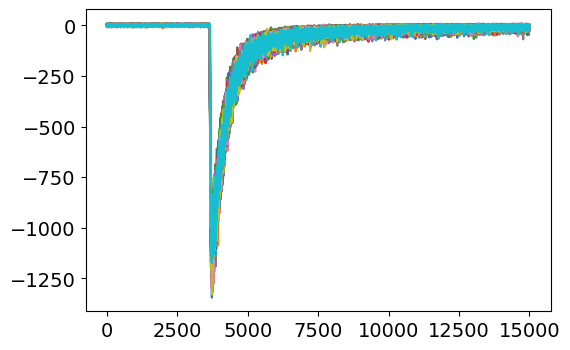

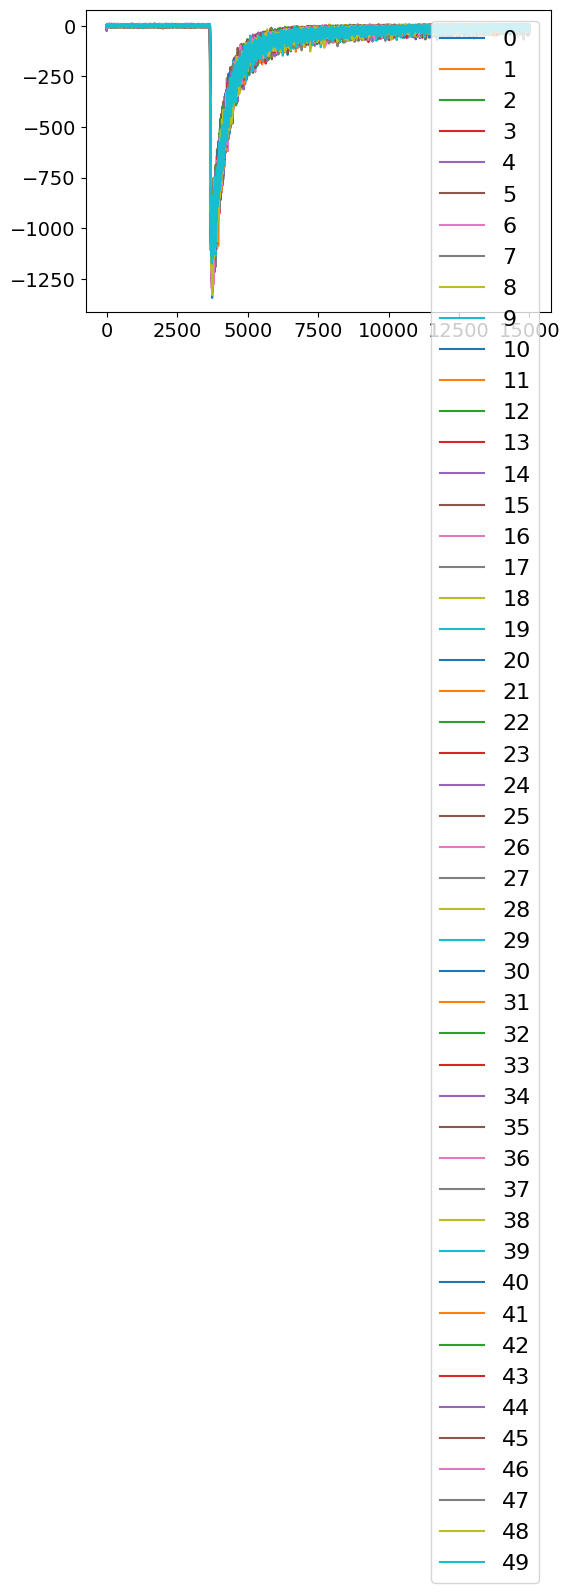

peak memory: 1026.74 MiB, increment: 0.56 MiB


In [11]:
%%memit
m = random.sample(m, 50)
tem_arr = []
for n in range(len(m)):    
    wavenum = Tl.waveform_number_PS_FT[m][n]-1
#     print(Tl.t0pil_Had_PS_FT[m][n]*fs,  Tl.amppil_Had_PS_FT[m][n],   Tl.chi2pil_Had_PS_FT[m][n]/1e7)
#     print(Tl.rundata_PS_FT[m][n].decode('utf-8'))
    if Tl.rundata_PS_FT[m][n].decode('utf-8')[14-2:19-2] == 'XFEL0': 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+Tl.rundata_PS_FT[m][n].decode('utf-8')[14-2:20-2]+'/'
        chunks = pd.read_csv(infolder+Tl.rundata_PS_FT[m][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)
    elif Tl.rundata_PS_FT[m][n].decode('utf-8')[14-2:19-2] == 'run12': 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+Tl.rundata_PS_FT[m][n].decode('utf-8')[14-2:19-2]+'/'
        chunks = pd.read_csv(infolder+Tl.rundata_PS_FT[m][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)
    else: 
        infolder =r'../../../../../../../../media/s/SeagateHD/'+Tl.rundata_PS_FT[m][n].decode('utf-8')[14-2:25-2]+'/'
        chunks = pd.read_csv(infolder+Tl.rundata_PS_FT[m][n].decode('utf-8')+'.txt', skiprows=wavenum*15000, chunksize = 15000,  header = None)

    trace_3 = chunks.get_chunk(15000).values.reshape( 15000, 1)
    trace_3 = trace_3.T-np.expand_dims(trace_3[100:1000,:].mean(axis=0), axis=0).T

    try: tem_arr = np.append(tem_arr, trace_3, axis = 0)
    except: tem_arr = trace_3
#     print(tem_arr.shape)
amp, t0, chi2 = OF_calct0(signal = tem_arr, 
                    template_norm = TemplateHAD_Tl, 
                    psd_noise =np.load('./saved_outputs/psd_noise_Tl.npy')[1], 
                    fs=1/2e-9,  
                    recordlength=15000)
for i, x in enumerate(tem_arr):
    plt.plot(range(15000), x, label = i)
#     plt.xlim(3600,3800)
plt.show()
for i in range(len(tem_arr)):  
    tem_arr[i] = np.roll(tem_arr[i], int(t0[i]*1/2e-9)*-1)
    
for i, x in enumerate(tem_arr):
    plt.plot(range(15000), x, label = i)
#     plt.xlim(3600,3800)
plt.legend()
plt.show()

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


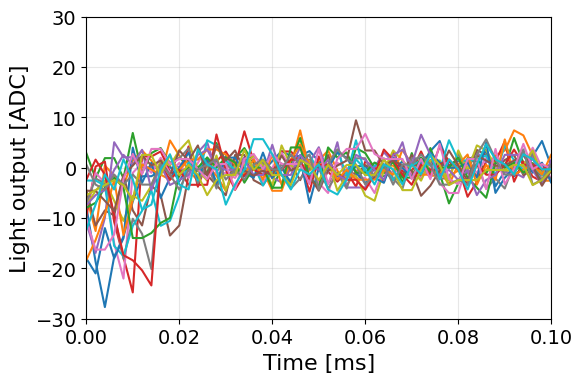

In [33]:
    
for i, x in enumerate(tem_arr):
    plt.plot(np.arange(15000)*2e-3, x, label = i)
plt.xlim(0,0.1)
# plt.legend()
plt.ylabel('Light output [ADC]')
plt.xlabel('Time [ms]')
plt.grid(alpha=0.3)
plt.ylim(-30,30)
plt.show()

In [8]:

# for i, x in enumerate(tem_arr):
#     if min(x)<-6000:
#         print(i)

t = np.delete(tem_arr, [19], axis = 0)
for i, x in enumerate(t):
    plt.plot(range(15000), x, label = i)
plt.legend()
plt.show()

NameError: name 'tem_arr' is not defined

In [13]:
te, Te = create_template(tem_arr)

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(-10.0, 10.0)

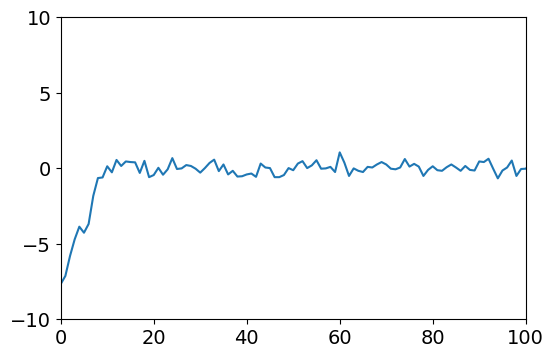

In [15]:
plt.plot(te)
plt.xlim(0,100)
plt.ylim(-10,10)


In [ ]:
t1 = t

In [12]:
np.save('templates/cosmics_Tl_1000_pulses', tem_arr)

/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
t1 = t

In [ ]:
te = np.append(t1, t, axis =0)

In [ ]:
te.shape

In [ ]:
te.shape

In [ ]:
te = np.append(t1, t, axis =0)